### Step 1 - Data Understanding and Visualization

In [7]:
# importing all relevant libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

##### Data dictionary of the dataset for reference
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [485]:
data = pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### 1.a Data Understanding

In [272]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   instant        730 non-null    int64  
 1   dteday         730 non-null    object 
 2   holiday        730 non-null    int64  
 3   weekday        625 non-null    object 
 4   workingday     730 non-null    int64  
 5   weathersit     730 non-null    int64  
 6   temp           730 non-null    float64
 7   atemp          730 non-null    float64
 8   hum            730 non-null    float64
 9   windspeed      730 non-null    float64
 10  casual         730 non-null    int64  
 11  registered     730 non-null    int64  
 12  cnt            730 non-null    int64  
 13  temp_variance  730 non-null    float64
 14  weekend        730 non-null    int64  
 15  2019           730 non-null    int32  
 16  Spring         730 non-null    int32  
 17  Summer         730 non-null    int32  
 18  Winter    

Data formats looks good. No changes required

In [153]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [155]:
data.shape

(730, 16)

#### 1.b Exploratory Data Analysis (EDA) and Visualization

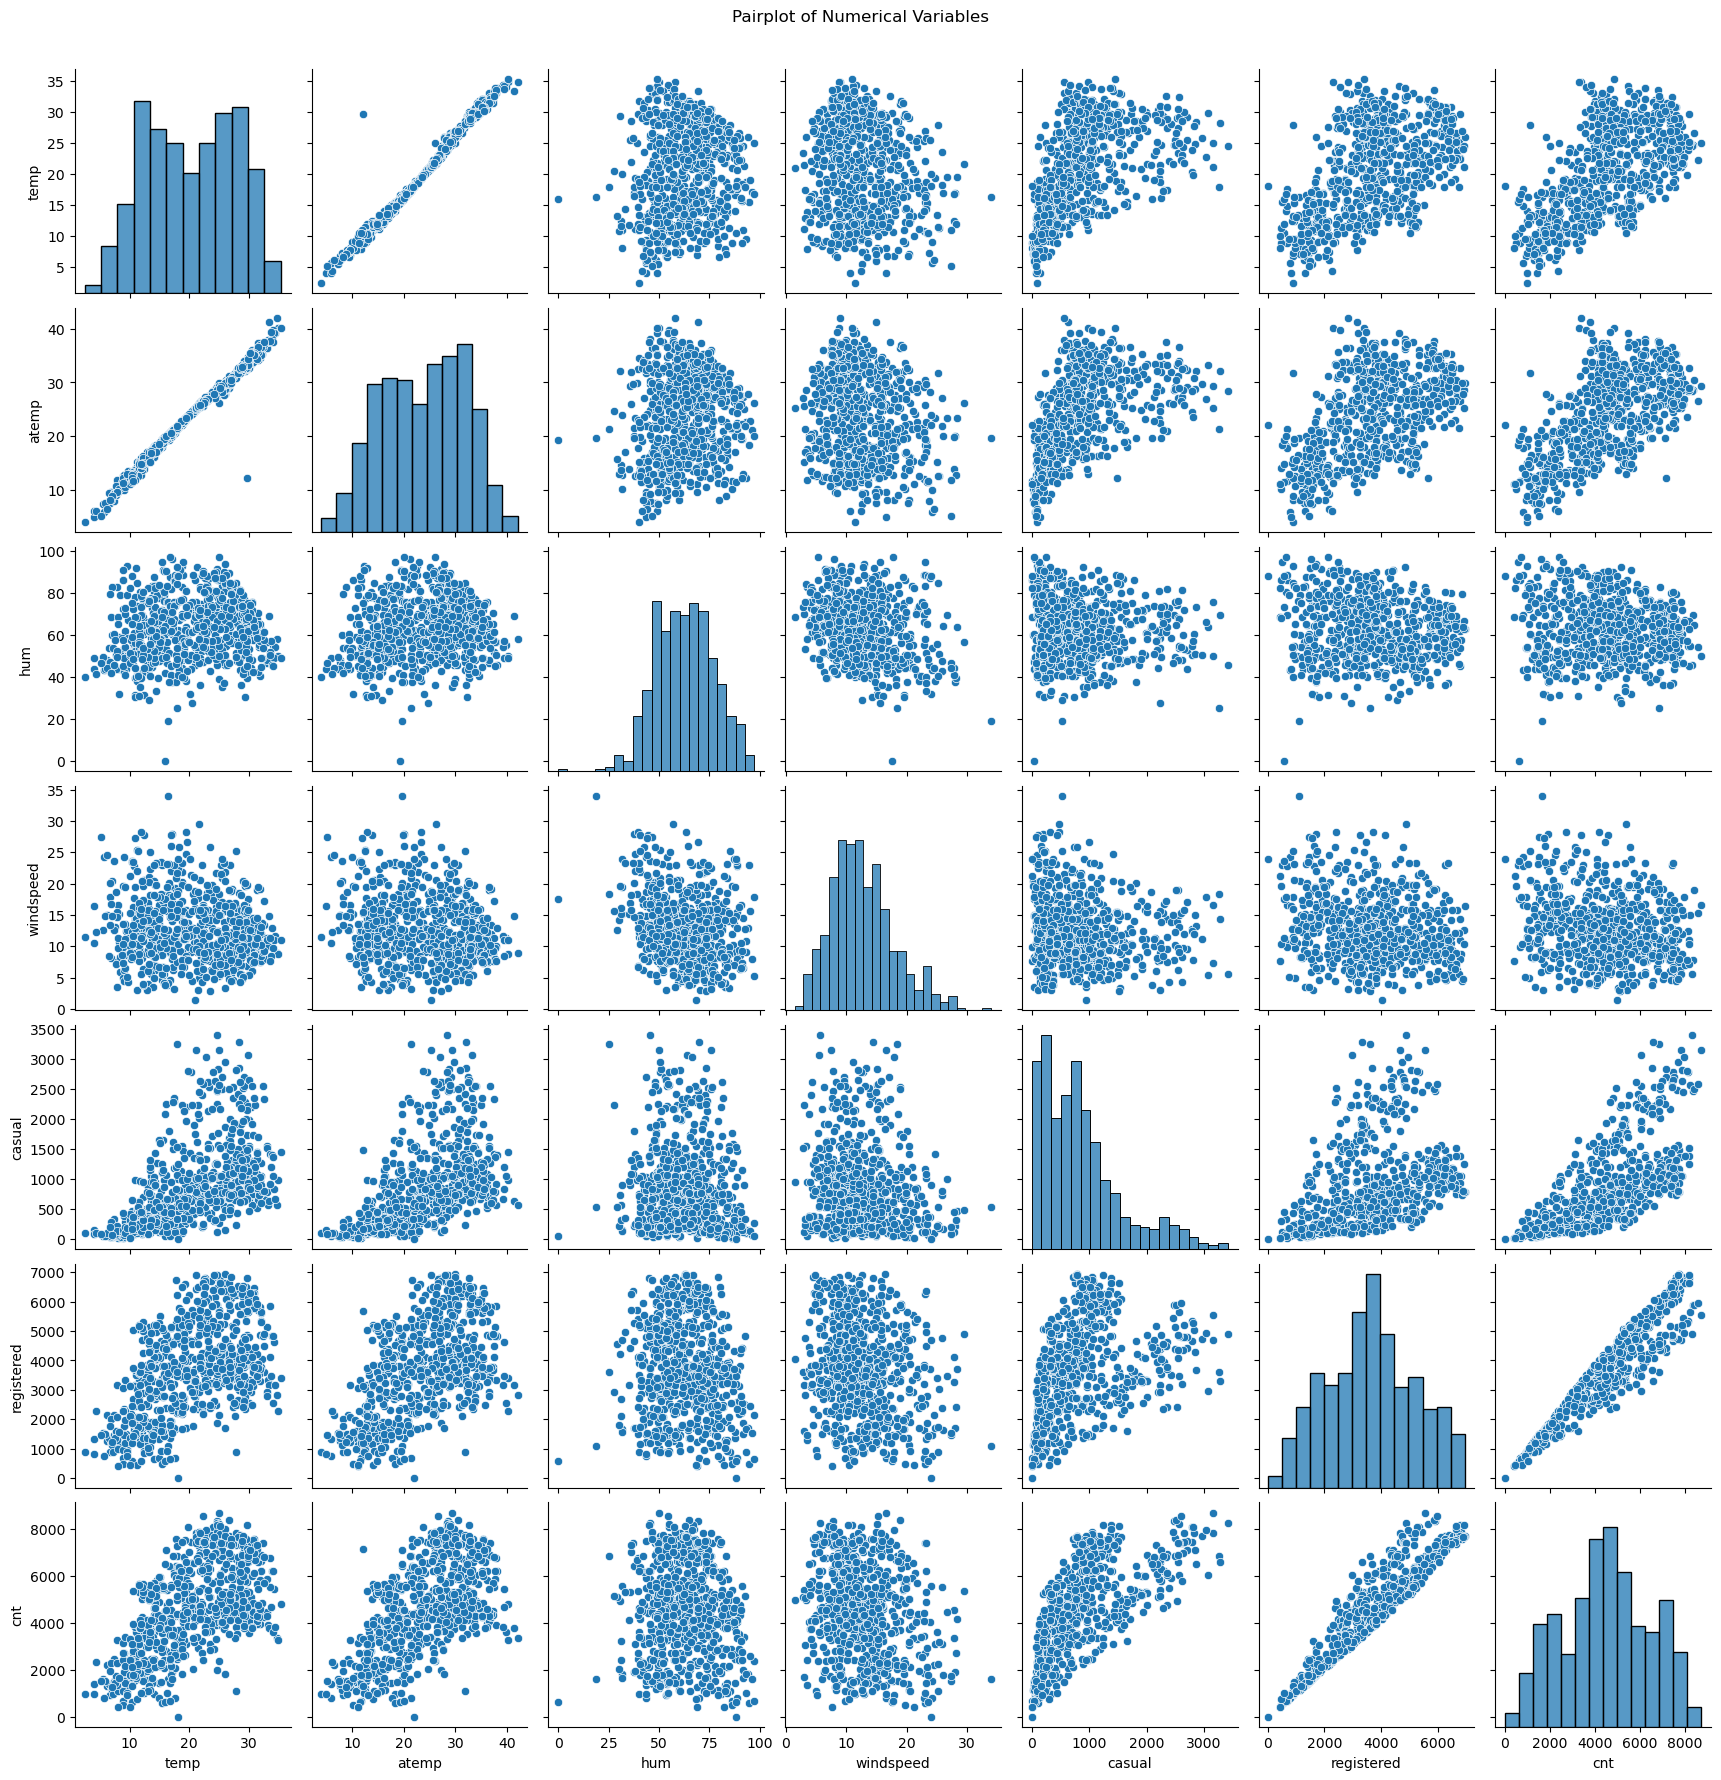

In [158]:
# Visualizing numerical variables
sns.pairplot(data[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']])
plt.suptitle("Pairplot of Numerical Variables", y=1.02)
plt.show()

There is a positive correlation between cnt and temp indicating as the temperature is warmer the count of users also goes up.

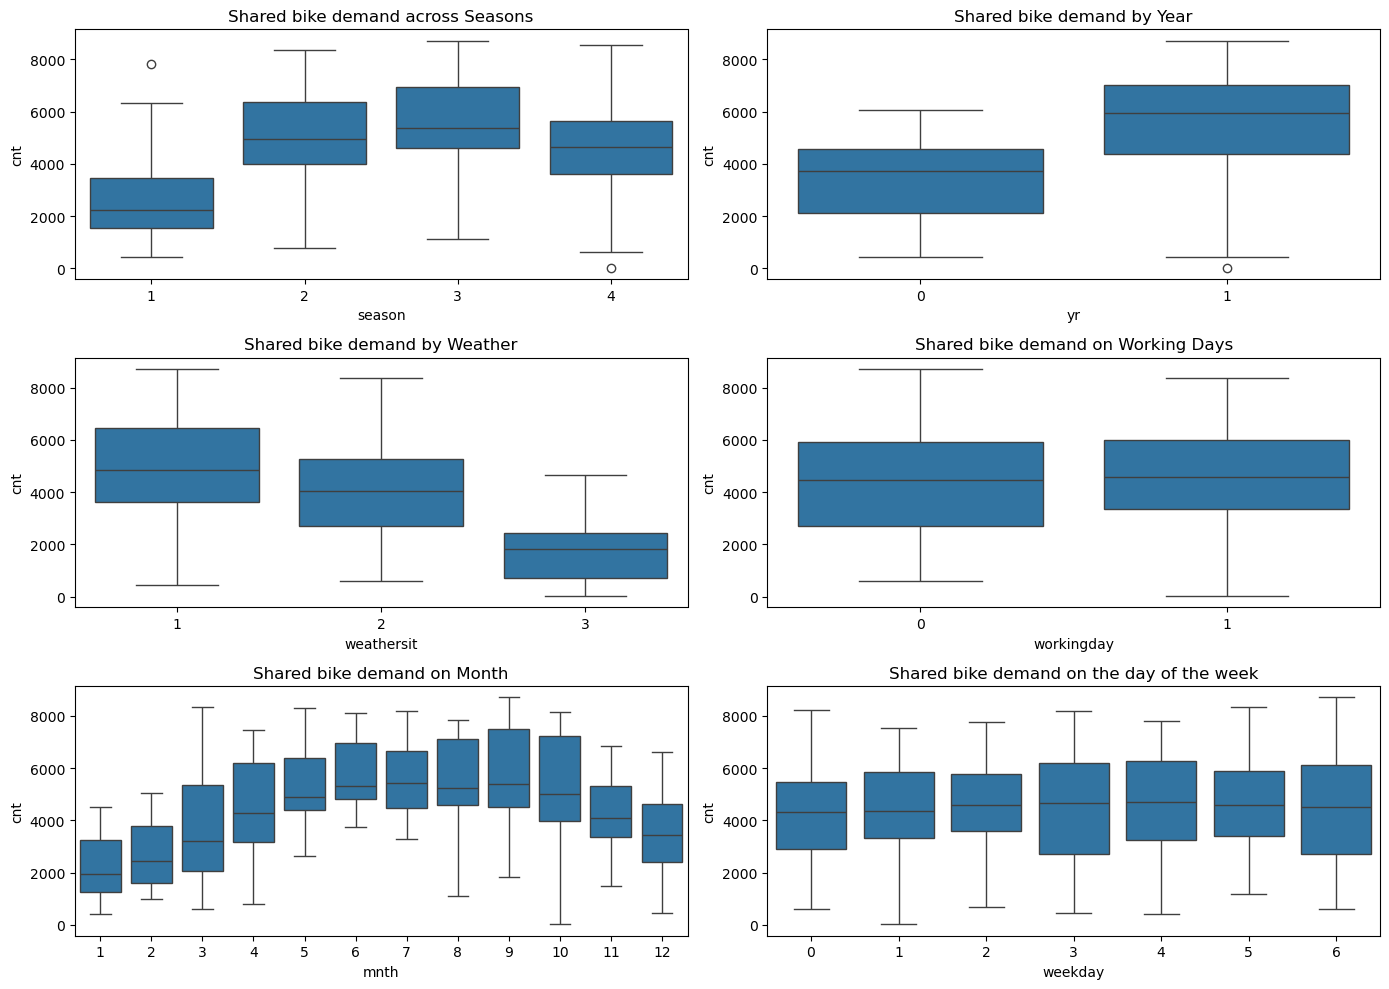

In [161]:
# Visualizing categorical variables
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
sns.boxplot(ax=axes[0, 0], x='season', y='cnt', data=data).set_title('Shared bike demand across Seasons')
sns.boxplot(ax=axes[0, 1], x='yr', y='cnt', data=data).set_title('Shared bike demand by Year')
sns.boxplot(ax=axes[1, 0], x='weathersit', y='cnt', data=data).set_title('Shared bike demand by Weather')
sns.boxplot(ax=axes[1, 1], x='workingday', y='cnt', data=data).set_title('Shared bike demand on Working Days')
sns.boxplot(ax=axes[2, 0], x='mnth', y='cnt', data=data).set_title('Shared bike demand on Month')
sns.boxplot(ax=axes[2, 1], x='weekday', y='cnt', data=data).set_title('Shared bike demand on the day of the week')
plt.tight_layout()
plt.show()

##### Quiet interesting insights can be gathered from the categorical variables:
- Bike demand is clearly seasonal showing lowest demand in spring. As the season progresses through summer to fall we see an increase in demand. Once the winter starts, the demand slowly reduces.
- Seasonal demand correlates to the months as well with higher demands from June to October. Post that the demand slowly reduces.
- We see a significant rise in demand in 2019 compared to 2018 indicating a growing popularity of shared bikes.
- While the median user count is same across all the 7 days of the week, we see a higher distribution of users on the 3rd and 6th days of the week.

### Step 2 - Data Preparation

#### 1.a Adding derived metrics
- Temperature variance = Difference between actual temperature (temp) and feel-like temperature (atemp)
- Weekend indicator = Classify Saturday and Sunday as 1 to check if there exist weekend has an influence
- Humidity-Windspeed factor = windspeed * hum (a high value could indicate both humidity and windspeed are relatively high at the same time, while a lower value could mean one or both factors are low)
- % of Registered Users = Number of Registered Users / Total Users

In [487]:
data['temp_variance'] = data['temp'] - data['atemp']
data['weekend'] = data['weekday'].apply(lambda x: 1 if x in [4, 5] else 0)  # Assuming 6=Monday, 0=Tuesday
data['Humidity-Wind factor'] = data['windspeed'] * data['hum']
data['% of Registered users'] = data['registered'] / data['cnt']
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_variance,weekend,Humidity-Wind factor,% of Registered users
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,-4.070403,0,866.260966,0.663959
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,-2.784352,0,1159.131938,0.836454
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,-1.419326,0,727.478103,0.911045
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,-2.406100,0,634.117271,0.930858
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,-2.158263,0,547.170664,0.948750


#### 1.b Handling Categorical variables through Encoding
Many of the Categorical variables like 'yr', 'season', 'weathersit' etc need to be encoded.
Hence we will first convert the categorical varaiable from binary to the relevant text and then encode them using dummy variables.

In [489]:
# Step 1: Convert 'yr' from 0 and 1 to 2018 and 2019 respectively
data['yr'] = data['yr'].apply(lambda x: "2018" if x == 0 else "2019")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_variance,weekend,Humidity-Wind factor,% of Registered users
0,1,01-01-2018,1,2018,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,-4.070403,0,866.260966,0.663959
1,2,02-01-2018,1,2018,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,-2.784352,0,1159.131938,0.836454
2,3,03-01-2018,1,2018,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,-1.419326,0,727.478103,0.911045
3,4,04-01-2018,1,2018,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,-2.406100,0,634.117271,0.930858
4,5,05-01-2018,1,2018,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,-2.158263,0,547.170664,0.948750


In [491]:
# Step 2: Create dummy variables using the 'yr' field
year_ = pd.get_dummies(data['yr'], drop_first=True).astype(int)
year_.head()

,2019
0,0
1,0
2,0
3,0
4,0


In [493]:
# Step 3: Concatenate the dummy variables to the overall data
data = pd.concat([data, year_], axis = 1)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,temp_variance,weekend,Humidity-Wind factor,% of Registered users,2019
0,1,01-01-2018,1,2018,1,0,6,0,2,14.110847,...,80.5833,10.749882,331,654,985,-4.070403,0,866.260966,0.663959,0
1,2,02-01-2018,1,2018,1,0,0,0,2,14.902598,...,69.6087,16.652113,131,670,801,-2.784352,0,1159.131938,0.836454,0
2,3,03-01-2018,1,2018,1,0,1,1,1,8.050924,...,43.7273,16.636703,120,1229,1349,-1.419326,0,727.478103,0.911045,0
3,4,04-01-2018,1,2018,1,0,2,1,1,8.200000,...,59.0435,10.739832,108,1454,1562,-2.406100,0,634.117271,0.930858,0
4,5,05-01-2018,1,2018,1,0,3,1,1,9.305237,...,43.6957,12.522300,82,1518,1600,-2.158263,0,547.170664,0.948750,0


In [495]:
# Step 4: drop the field 'yr' since it is now encoded
data = data.drop("yr",axis=1)
data.head()

,instant,dteday,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_variance,weekend,Humidity-Wind factor,% of Registered users,2019
0,1,01-01-2018,1,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,-4.070403,0,866.260966,0.663959,0
1,2,02-01-2018,1,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,-2.784352,0,1159.131938,0.836454,0
2,3,03-01-2018,1,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,-1.419326,0,727.478103,0.911045,0
3,4,04-01-2018,1,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,-2.406100,0,634.117271,0.930858,0
4,5,05-01-2018,1,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,-2.158263,0,547.170664,0.948750,0


In [497]:
# Similarly, now let's do it for 'season'
data['season'] = data['season'].astype(int)

# Converting the binary values to relevant text
data['season'] = data['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# Creating dummy variables from the new texts
season_ = pd.get_dummies(data['season'], drop_first=True).astype(int)

# Concatenating the dummy variables to the overall dataset
data = pd.concat([data, season_], axis = 1)

# Drop the field 'season' since it is now encoded
data = data.drop("season",axis=1)
data.head()

,instant,dteday,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,registered,cnt,temp_variance,weekend,Humidity-Wind factor,% of Registered users,2019,Spring,Summer,Winter
0,1,01-01-2018,1,0,6,0,2,14.110847,18.18125,80.5833,...,654,985,-4.070403,0,866.260966,0.663959,0,1,0,0
1,2,02-01-2018,1,0,0,0,2,14.902598,17.68695,69.6087,...,670,801,-2.784352,0,1159.131938,0.836454,0,1,0,0
2,3,03-01-2018,1,0,1,1,1,8.050924,9.47025,43.7273,...,1229,1349,-1.419326,0,727.478103,0.911045,0,1,0,0
3,4,04-01-2018,1,0,2,1,1,8.200000,10.60610,59.0435,...,1454,1562,-2.406100,0,634.117271,0.930858,0,1,0,0
4,5,05-01-2018,1,0,3,1,1,9.305237,11.46350,43.6957,...,1518,1600,-2.158263,0,547.170664,0.948750,0,1,0,0


In [499]:
# Similarly, now let's do it for 'mnth'
data['mnth'] = data['mnth'].astype(int)

# Converting the binary values to relevant text
data['mnth'] = data['mnth'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 
                                 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

# Creating dummy variables from the new texts
mnth_ = pd.get_dummies(data['mnth'], drop_first=True).astype(int)

# Concatenating the dummy variables to the overall dataset
data = pd.concat([data, mnth_], axis = 1)

# Drop the field 'mnth' since it is now encoded
data = data.drop("mnth",axis=1)

data.head()

,instant,dteday,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,December,February,January,July,June,March,May,November,October,September
0,1,01-01-2018,0,6,0,2,14.110847,18.18125,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,2,02-01-2018,0,0,0,2,14.902598,17.68695,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,3,03-01-2018,0,1,1,1,8.050924,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,0,2,1,1,8.200000,10.60610,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,5,05-01-2018,0,3,1,1,9.305237,11.46350,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


In [501]:
# Similarly, now let's do it for 'weekday'
data['weekday'] = data['weekday'].astype(int)

# Converting the binary values to relevant text
data['weekday'] = data['weekday'].map({0: 'Tuesday', 1: 'Wednesday', 2: 'Thursday', 
                                       3: 'Friday', 4: 'Saturday', 5: 'Sunday', 6: 'Monday'})

# Creating dummy variables from the new texts
weekday_ = pd.get_dummies(data['weekday'], drop_first=True).astype(int)

# Concatenating the dummy variables to the overall dataset
data = pd.concat([data, weekday_], axis = 1)

# Drop the field 'weekday' since it is now encoded
data = data.drop("weekday",axis=1)

data.head()

,instant,dteday,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,01-01-2018,0,0,2,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,0,1,0,0,0,0,0
1,2,02-01-2018,0,0,2,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,0,0,0,1,0
2,3,03-01-2018,0,1,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,0,0,0,0,0,1
3,4,04-01-2018,0,1,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,0,0,1,0,0
4,5,05-01-2018,0,1,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,0,0,0,0


In [503]:
# Similarly, now let's do it for 'weathersit'
data['weathersit'] = data['weathersit'].astype(int)

# Converting the binary values to relevant text
data['weathersit'] = data['weathersit'].map({1: 'Clear', 2: 'Misty', 3: 'Precipitation', 4: 'Stormy'})

# Creating dummy variables from the new texts
weathersit_ = pd.get_dummies(data['weathersit'], drop_first=True).astype(int)

# Concatenating the dummy variables to the overall dataset
data = pd.concat([data, weathersit_], axis = 1)

# Drop the field 'weathersit' since it is now encoded
data = data.drop("weathersit",axis=1)

data.head()

,instant,dteday,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Misty,Precipitation
0,1,01-01-2018,0,0,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,1,0,0,0,0,0,1,0
1,2,02-01-2018,0,0,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,0,0,0,1,0,1,0
2,3,03-01-2018,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,0,0,0,0,0,1,0,0
3,4,04-01-2018,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,0,1,0,0,0,0
4,5,05-01-2018,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,0,0,0


In [505]:
# Adding the derived metric second half of the year.
data['second_half'] = data[['July', 'August', 'September', 'October', 'November', 'December']].max(axis=1)
data.head()

,instant,dteday,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Misty,Precipitation,second_half
0,1,01-01-2018,0,0,14.110847,18.18125,80.5833,10.749882,331,654,...,0,1,0,0,0,0,0,1,0,0
1,2,02-01-2018,0,0,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,0,0,1,0,1,0,0
2,3,03-01-2018,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,0,0,0,0,1,0,0,0
3,4,04-01-2018,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,1,0,0,0,0,0
4,5,05-01-2018,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,0,0,0


In [507]:
data.shape

(730, 39)

As expected number of columns increased while the number of rows remain the same

In [509]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   instant                730 non-null    int64  
 1   dteday                 730 non-null    object 
 2   holiday                730 non-null    int64  
 3   workingday             730 non-null    int64  
 4   temp                   730 non-null    float64
 5   atemp                  730 non-null    float64
 6   hum                    730 non-null    float64
 7   windspeed              730 non-null    float64
 8   casual                 730 non-null    int64  
 9   registered             730 non-null    int64  
 10  cnt                    730 non-null    int64  
 11  temp_variance          730 non-null    float64
 12  weekend                730 non-null    int64  
 13  Humidity-Wind factor   730 non-null    float64
 14  % of Registered users  730 non-null    float64
 15  2019  

In [552]:
plt.figure(figsize = (16,10))
sns.heatmap(data.corr(),annot= True, cmap = "YlGnBu")
plt.show()

ValueError: could not convert string to float: '01-01-2018'

<Figure size 1600x1000 with 0 Axes>

#### 1.c Divide the data into Train and Test and then Scale

In [574]:
# Defining independent variables (X) and target variable (y)
X = data.drop(['cnt', 'casual', 'registered', 'dteday', 'instant'], axis=1)
y = data['cnt']

In [576]:
# Split the data into train and test sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=100)

In [578]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(547, 34)
(183, 34)
(547,)
(183,)


Shape looks good

In [580]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   instant                730 non-null    int64  
 1   dteday                 730 non-null    object 
 2   holiday                730 non-null    int64  
 3   workingday             730 non-null    int64  
 4   temp                   730 non-null    float64
 5   atemp                  730 non-null    float64
 6   hum                    730 non-null    float64
 7   windspeed              730 non-null    float64
 8   casual                 730 non-null    int64  
 9   registered             730 non-null    int64  
 10  cnt                    730 non-null    int64  
 11  temp_variance          730 non-null    float64
 12  weekend                730 non-null    int64  
 13  Humidity-Wind factor   730 non-null    float64
 14  % of Registered users  730 non-null    float64
 15  2019  

In [582]:
# Update Scaling for numerical variables, including the derived variables
scaler = MinMaxScaler()
numerical_vars = ['temp', 'atemp', 'hum', 'windspeed', 'temp_variance', 'Humidity-Wind factor','% of Registered users']

# Apply scaling to numerical columns in train and test sets
X_train[numerical_vars] = scaler.fit_transform(X_train[numerical_vars])
X_test[numerical_vars] = scaler.transform(X_test[numerical_vars])

### Step 3 - Model Training

We will first start with all variables and then iteratively remove one by one with high p-value and multicolinearity

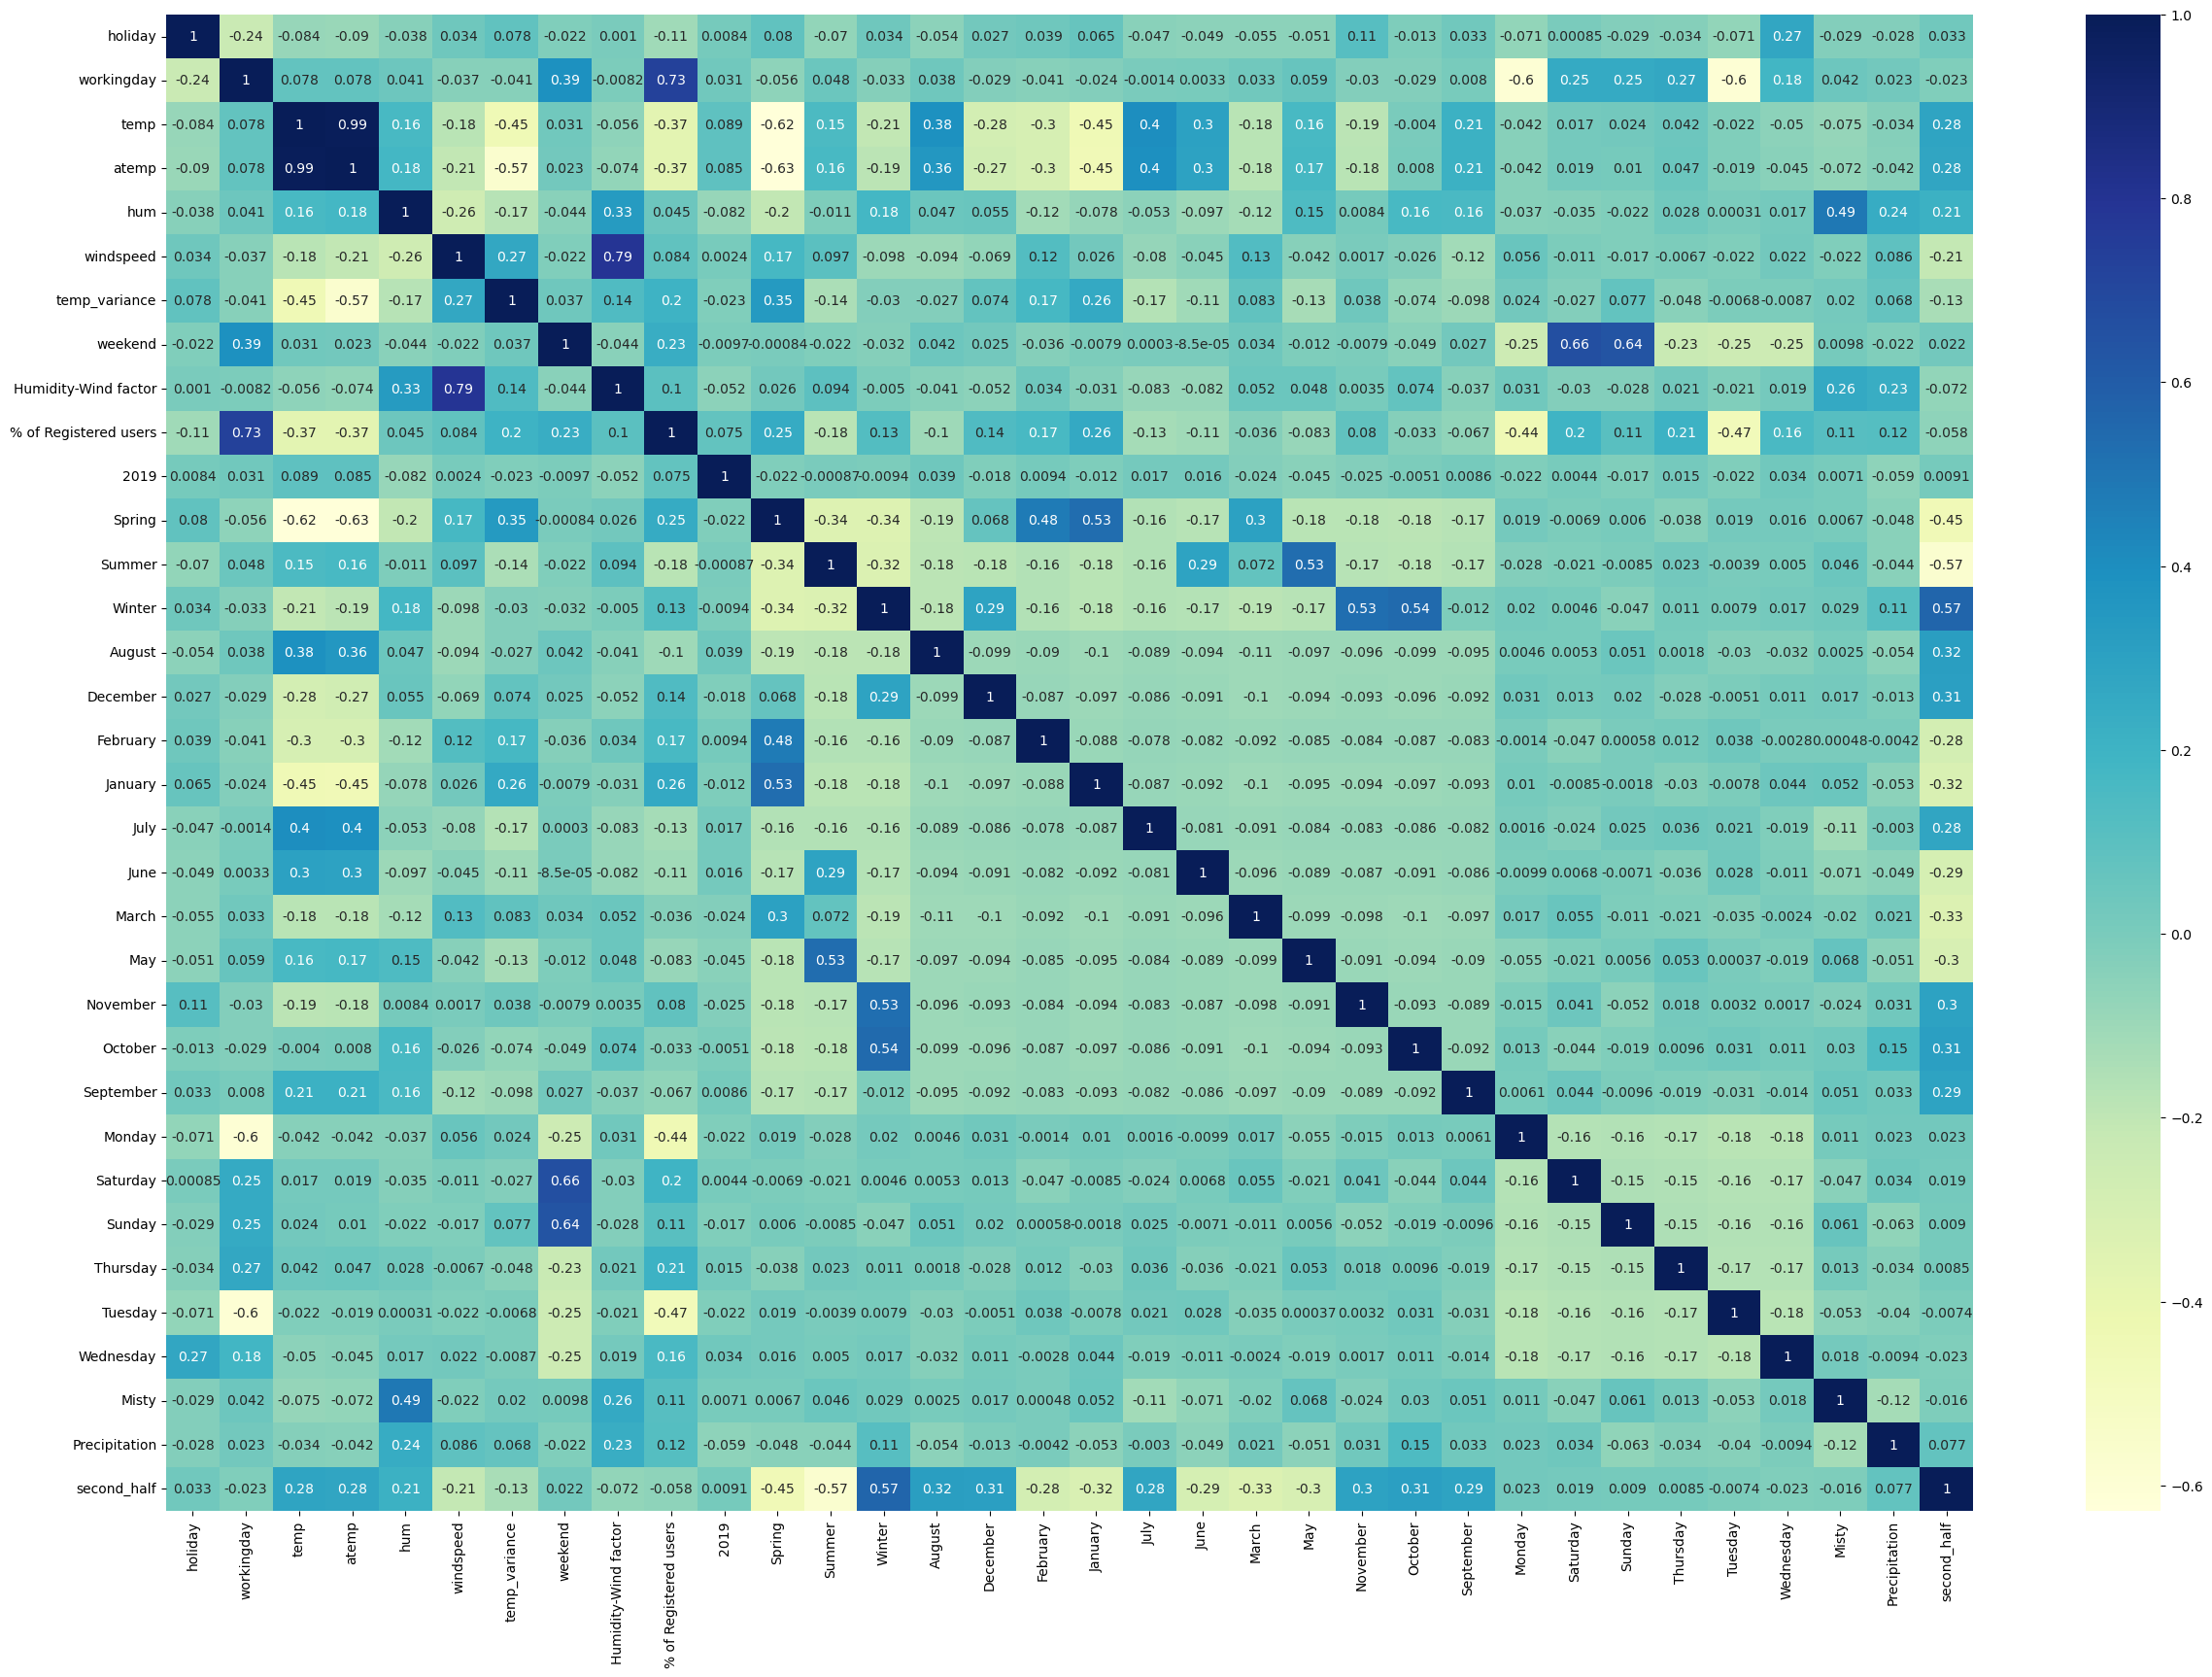

In [584]:
# Let's first check the correlation between the independant variables in the training data set
plt.figure(figsize = (30,20))
sns.heatmap(X_train.corr(),annot= True, cmap = "YlGnBu")
plt.show()

We can see that many of the independant variables are correlated like second_half is correlated to the corresponding months and weekend is correlated with Saturday and Sunday etc.

We could have removed the obvious ones earlier, but since this is the first attempt need to see what is the impact on all the variables.

In [587]:
# Adding constant
X_train_const = sm.add_constant(X_train)

#create the first model
lr_model = sm.OLS(y_train, X_train_const).fit()

#param
lr_model.params

const                    2530.044597
holiday                    18.300736
workingday               1407.746607
temp                     1776.575356
atemp                    1481.030747
hum                      -470.728861
windspeed                -480.161158
temp_variance             667.317079
weekend                   -31.010376
Humidity-Wind factor     -960.852222
% of Registered users   -1716.681028
2019                     2073.925627
Spring                   -544.627441
Summer                    235.484702
Winter                   1110.498903
August                    306.364931
December                 -420.993679
February                  -60.232454
January                  -274.149499
July                     -123.054033
June                      307.767681
March                      12.883206
May                       293.616434
November                 -468.297673
October                   -50.669977
September                 758.367826
Monday                    791.011899
S

In [589]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     108.5
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.61e-201
Time:                        19:21:38   Log-Likelihood:                -4377.0
No. Observations:                 547   AIC:                             8816.
Df Residuals:                     516   BIC:                             8950.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2530.0446    414.487      6.104      0.000    1715.755    3344.335
holiday                  18.3007    205.350      0.089      0.929    -385.123     421.725
workingday             1407.7466    177.563      7.928      0.000    1058.911    1756.582
temp                   1776.5754    390.634      4.548      0.000    1009.147    2544.004
atemp                  1481.0307    237.828      6.227      0.000    1013.801    1948.261
hum                    -470.7289    645.160     -0.730      0.466   -1738.193     796.735
windspeed              -480.1612    804.052     -0.597      0.551   -2059.779    1099.457
temp_variance           667.3171    637.802      1.046      0.296    -585.691    1920.325
weekend                 -31.0104     70.038     -0.443      0.658    -168.605     106.585
Humidity-Wind factor   -960.8522    880.679     -1.091      0.276   -2691.009     769.305
% of Registered users -1716.6810    345.553     -4.968      0.000   -2395.544   -1037.818
2019                   2073.9256     66.737     31.076      0.000    1942.817    2205.034
Spring                 -544.6274    241.975     -2.251      0.025   -1020.005     -69.250
Summer                  235.4847    214.629      1.097      0.273    -186.169     657.138
Winter                 1110.4989    225.288      4.929      0.000     667.905    1553.093
August                  306.3649    169.019      1.813      0.070     -25.685     638.415
December               -420.9937    166.966     -2.521      0.012    -749.011     -92.977
February                -60.2325    270.975     -0.222      0.824    -592.582     472.117
January                -274.1495    279.305     -0.982      0.327    -822.865     274.566
July                   -123.0540    186.121     -0.661      0.509    -488.703     242.595
June                    307.7677    203.612      1.512      0.131     -92.242     707.778
March                    12.8832    205.056      0.063      0.950    -389.965     415.731
May                     293.6164    174.607      1.682      0.093     -49.412     636.645
November               -468.2977    172.909     -2.708      0.007    -807.990    -128.605
October                 -50.6700    158.855     -0.319      0.750    -362.752     261.412
September               758.3678    129.136      5.873      0.000     504.671    1012.065
Monday                  791.0119    123.501      6.405      0.000     548.385    1033.638
Saturday                -19.0972     71.910     -0.266      0.791    -160.369     122.174
Sunday                  -11.9132     74.560     -0.160      0.873    -158.392     134.566
Thursday               -138.2636    120.004     -1.152      0.250    -374.020      97.492
Tuesday                 312.9854    123.770      2.529      0.012      69.830     556.141
Wednesday              

#### Checking VIF

In [592]:
# Higher the correlation of a variable to the other variables, the VIF of that variable will be high
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range (X_train.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

C:\Office\Anaconda\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,holiday,inf
14,August,inf
29,Tuesday,inf
27,Sunday,inf
26,Saturday,inf
25,Monday,inf
24,September,inf
23,October,inf
22,November,inf
18,July,inf


As seen from the correlation matrix, too many variables with multicollinearity. Many variables with perfect multicollinearity. Let's now remove one variable at a time (based on the p-value and VIF) and keep monitoring the R-Squared. We will start with those showing inf in VIF.

In [595]:
# Drop variable

X = X_train.drop("holiday", axis=1)

In [603]:
# create another model

X_train_sm = sm.add_constant(X)

lr_model = sm.OLS(y_train, X_train_sm).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     108.5
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.61e-201
Time:                        19:39:44   Log-Likelihood:                -4377.0
No. Observations:                 547   AIC:                             8816.
Df Residuals:                     516   BIC:                             8950.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2548.1562    561.419      4.539      0.000    1445.208    3651.104
workingday             1389.4459    232.444      5.978      0.000     932.793    1846.099
temp                   1775.4901    394.876      4.496      0.000     999.727    2551.253
atemp                  1482.2871    238.742      6.209      0.000    1013.262    1951.312
hum                    -470.7289    645.160     -0.730      0.466   -1738.193     796.735
windspeed              -480.1612    804.052     -0.597      0.551   -2059.779    1099.457
temp_variance           668.1351    636.019      1.050      0.294    -581.371    1917.641
weekend                 -31.0104     70.038     -0.443      0.658    -168.605     106.585
Humidity-Wind factor   -960.8522    880.679     -1.091      0.276   -2691.009     769.305
% of Registered users -1716.6810    345.553     -4.968      0.000   -2395.544   -1037.818
2019                   2073.9256     66.737     31.076      0.000    1942.817    2205.034
Spring                 -544.6274    241.975     -2.251      0.025   -1020.005     -69.250
Summer                  235.4847    214.629      1.097      0.273    -186.169     657.138
Winter                 1110.4989    225.288      4.929      0.000     667.905    1553.093
August                  306.3649    169.019      1.813      0.070     -25.685     638.415
December               -420.9937    166.966     -2.521      0.012    -749.011     -92.977
February                -60.2325    270.975     -0.222      0.824    -592.582     472.117
January                -274.1495    279.305     -0.982      0.327    -822.865     274.566
July                   -123.0540    186.121     -0.661      0.509    -488.703     242.595
June                    307.7677    203.612      1.512      0.131     -92.242     707.778
March                    12.8832    205.056      0.063      0.950    -389.965     415.731
May                     293.6164    174.607      1.682      0.093     -49.412     636.645
November               -468.2977    172.909     -2.708      0.007    -807.990    -128.605
October                 -50.6700    158.855     -0.319      0.750    -362.752     261.412
September               758.3678    129.136      5.873      0.000     504.671    1012.065
Monday                  772.7112    240.627      3.211      0.001     299.983    1245.440
Saturday                -19.0972     71.910     -0.266      0.791    -160.369     122.174
Sunday                  -11.9132     74.560     -0.160      0.873    -158.392     134.566
Thursday               -138.2636    120.004     -1.152      0.250    -374.020      97.492
Tuesday                 294.6846    240.530      1.225      0.221    -177.854     767.224
Wednesday              -200.0436    119.963     -1.668      0.096    -435.720      35.633
Misty                  

In [607]:
# Checking VIF
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

C:\Office\Anaconda\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
32,second_half,inf
26,Sunday,inf
6,weekend,inf
25,Saturday,inf
23,September,inf
22,October,inf
21,November,inf
17,July,inf
13,August,inf
14,December,inf


In [609]:
# Drop variable

X = X_train.drop(["holiday","second_half"], axis=1)

In [611]:
# create another model

X_train_sm = sm.add_constant(X)

lr_model = sm.OLS(y_train, X_train_sm).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     108.5
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.61e-201
Time:                        19:42:35   Log-Likelihood:                -4377.0
No. Observations:                 547   AIC:                             8816.
Df Residuals:                     516   BIC:                             8950.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2548.1562    561.419      4.539      0.000    1445.208    3651.104
workingday             1389.4459    232.444      5.978      0.000     932.793    1846.099
temp                   1775.4901    394.876      4.496      0.000     999.727    2551.253
atemp                  1482.2871    238.742      6.209      0.000    1013.262    1951.312
hum                    -470.7289    645.160     -0.730      0.466   -1738.193     796.735
windspeed              -480.1612    804.052     -0.597      0.551   -2059.779    1099.457
temp_variance           668.1351    636.019      1.050      0.294    -581.371    1917.641
weekend                 -31.0104     70.038     -0.443      0.658    -168.605     106.585
Humidity-Wind factor   -960.8522    880.679     -1.091      0.276   -2691.009     769.305
% of Registered users -1716.6810    345.553     -4.968      0.000   -2395.544   -1037.818
2019                   2073.9256     66.737     31.076      0.000    1942.817    2205.034
Spring                 -544.6274    241.975     -2.251      0.025   -1020.005     -69.250
Summer                  235.4847    214.629      1.097      0.273    -186.169     657.138
Winter                 1110.4989    225.288      4.929      0.000     667.905    1553.093
August                  308.0823    276.711      1.113      0.266    -235.536     851.701
December               -419.2763    271.770     -1.543      0.124    -953.188     114.636
February                -60.2325    270.975     -0.222      0.824    -592.582     472.117
January                -274.1495    279.305     -0.982      0.327    -822.865     274.566
July                   -121.3366    288.182     -0.421      0.674    -687.491     444.818
June                    307.7677    203.612      1.512      0.131     -92.242     707.778
March                    12.8832    205.056      0.063      0.950    -389.965     415.731
May                     293.6164    174.607      1.682      0.093     -49.412     636.645
November               -466.5803    295.996     -1.576      0.116   -1048.086     114.925
October                 -48.9526    289.761     -0.169      0.866    -618.210     520.305
September               760.0852    260.501      2.918      0.004     248.313    1271.858
Monday                  772.7112    240.627      3.211      0.001     299.983    1245.440
Saturday                -19.0972     71.910     -0.266      0.791    -160.369     122.174
Sunday                  -11.9132     74.560     -0.160      0.873    -158.392     134.566
Thursday               -138.2636    120.004     -1.152      0.250    -374.020      97.492
Tuesday                 294.6846    240.530      1.225      0.221    -177.854     767.224
Wednesday              -200.0436    119.963     -1.668      0.096    -435.720      35.633
Misty                  

In [613]:
# Checking VIF
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

C:\Office\Anaconda\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
26,Sunday,inf
25,Saturday,inf
6,weekend,inf
2,atemp,4265.47
1,temp,3957.32
5,temp_variance,146.17
7,Humidity-Wind factor,18.88
4,windspeed,18.26
0,workingday,11.82
10,Spring,11.07


In [616]:
# Drop variable

X = X_train.drop(["holiday","second_half", "Sunday"], axis=1)

In [618]:
# create another model

X_train_sm = sm.add_constant(X)

lr_model = sm.OLS(y_train, X_train_sm).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     108.5
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.61e-201
Time:                        19:45:12   Log-Likelihood:                -4377.0
No. Observations:                 547   AIC:                             8816.
Df Residuals:                     516   BIC:                             8950.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2548.1562    561.419      4.539      0.000    1445.208    3651.104
workingday             1389.4459    232.444      5.978      0.000     932.793    1846.099
temp                   1775.4901    394.876      4.496      0.000     999.727    2551.253
atemp                  1482.2871    238.742      6.209      0.000    1013.262    1951.312
hum                    -470.7289    645.160     -0.730      0.466   -1738.193     796.735
windspeed              -480.1612    804.052     -0.597      0.551   -2059.779    1099.457
temp_variance           668.1351    636.019      1.050      0.294    -581.371    1917.641
weekend                 -42.9235    125.531     -0.342      0.733    -289.539     203.692
Humidity-Wind factor   -960.8522    880.679     -1.091      0.276   -2691.009     769.305
% of Registered users -1716.6810    345.553     -4.968      0.000   -2395.544   -1037.818
2019                   2073.9256     66.737     31.076      0.000    1942.817    2205.034
Spring                 -544.6274    241.975     -2.251      0.025   -1020.005     -69.250
Summer                  235.4847    214.629      1.097      0.273    -186.169     657.138
Winter                 1110.4989    225.288      4.929      0.000     667.905    1553.093
August                  308.0823    276.711      1.113      0.266    -235.536     851.701
December               -419.2763    271.770     -1.543      0.124    -953.188     114.636
February                -60.2325    270.975     -0.222      0.824    -592.582     472.117
January                -274.1495    279.305     -0.982      0.327    -822.865     274.566
July                   -121.3366    288.182     -0.421      0.674    -687.491     444.818
June                    307.7677    203.612      1.512      0.131     -92.242     707.778
March                    12.8832    205.056      0.063      0.950    -389.965     415.731
May                     293.6164    174.607      1.682      0.093     -49.412     636.645
November               -466.5803    295.996     -1.576      0.116   -1048.086     114.925
October                 -48.9526    289.761     -0.169      0.866    -618.210     520.305
September               760.0852    260.501      2.918      0.004     248.313    1271.858
Monday                  772.7112    240.627      3.211      0.001     299.983    1245.440
Saturday                 -7.1840    128.666     -0.056      0.955    -259.959     245.591
Thursday               -138.2636    120.004     -1.152      0.250    -374.020      97.492
Tuesday                 294.6846    240.530      1.225      0.221    -177.854     767.224
Wednesday              -200.0436    119.963     -1.668      0.096    -435.720      35.633
Misty                  -492.5249     84.840     -5.805      0.000    -659.199    -325.851
Precipitation         -

In [620]:
# Checking VIF
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
2,atemp,4265.47
1,temp,3957.32
5,temp_variance,146.17
7,Humidity-Wind factor,18.88
4,windspeed,18.26
0,workingday,11.82
10,Spring,11.07
12,Winter,9.27
3,hum,8.57
11,Summer,8.42


In [622]:
# Drop variable

X = X_train.drop(["holiday","second_half", "Sunday", "atemp"], axis=1)

In [624]:
# create another model

X_train_sm = sm.add_constant(X)

lr_model = sm.OLS(y_train, X_train_sm).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     108.5
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.61e-201
Time:                        19:46:54   Log-Likelihood:                -4377.0
No. Observations:                 547   AIC:                             8816.
Df Residuals:                     516   BIC:                             8950.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2771.2898    565.149      4.904      0.000    1661.013    3881.566
workingday             1389.4459    232.444      5.978      0.000     932.793    1846.099
temp                   3055.9176    417.606      7.318      0.000    2235.501    3876.334
hum                    -470.7289    645.160     -0.730      0.466   -1738.193     796.735
windspeed              -480.1612    804.052     -0.597      0.551   -2059.779    1099.457
temp_variance          -296.9253    750.885     -0.395      0.693   -1772.093    1178.242
weekend                 -42.9235    125.531     -0.342      0.733    -289.539     203.692
Humidity-Wind factor   -960.8522    880.679     -1.091      0.276   -2691.009     769.305
% of Registered users -1716.6810    345.553     -4.968      0.000   -2395.544   -1037.818
2019                   2073.9256     66.737     31.076      0.000    1942.817    2205.034
Spring                 -544.6274    241.975     -2.251      0.025   -1020.005     -69.250
Summer                  235.4847    214.629      1.097      0.273    -186.169     657.138
Winter                 1110.4989    225.288      4.929      0.000     667.905    1553.093
August                  308.0823    276.711      1.113      0.266    -235.536     851.701
December               -419.2763    271.770     -1.543      0.124    -953.188     114.636
February                -60.2325    270.975     -0.222      0.824    -592.582     472.117
January                -274.1495    279.305     -0.982      0.327    -822.865     274.566
July                   -121.3366    288.182     -0.421      0.674    -687.491     444.818
June                    307.7677    203.612      1.512      0.131     -92.242     707.778
March                    12.8832    205.056      0.063      0.950    -389.965     415.731
May                     293.6164    174.607      1.682      0.093     -49.412     636.645
November               -466.5803    295.996     -1.576      0.116   -1048.086     114.925
October                 -48.9526    289.761     -0.169      0.866    -618.210     520.305
September               760.0852    260.501      2.918      0.004     248.313    1271.858
Monday                  772.7112    240.627      3.211      0.001     299.983    1245.440
Saturday                 -7.1840    128.666     -0.056      0.955    -259.959     245.591
Thursday               -138.2636    120.004     -1.152      0.250    -374.020      97.492
Tuesday                 294.6846    240.530      1.225      0.221    -177.854     767.224
Wednesday              -200.0436    119.963     -1.668      0.096    -435.720      35.633
Misty                  -492.5249     84.840     -5.805      0.000    -659.199    -325.851
Precipitation         -2070.5532    223.985     -9.244      0.000   -2510.588   -1630.518
=======================

In [626]:
# Checking VIF
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
2,hum,139.63
6,Humidity-Wind factor,94.92
3,windspeed,66.43
7,% of Registered users,51.09
1,temp,47.22
0,workingday,34.14
4,temp_variance,13.79
9,Spring,13.39
11,Winter,12.17
10,Summer,8.84


In [628]:
# Drop variable

X = X_train.drop(["holiday","second_half", "Sunday", "atemp", "Saturday"], axis=1)

In [630]:
# create another model

X_train_sm = sm.add_constant(X)

lr_model = sm.OLS(y_train, X_train_sm).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     112.5
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.51e-202
Time:                        19:50:44   Log-Likelihood:                -4377.0
No. Observations:                 547   AIC:                             8814.
Df Residuals:                     517   BIC:                             8943.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2772.2992    564.315      4.913      0.000    1663.666    3880.932
workingday             1390.4039    231.586      6.004      0.000     935.438    1845.370
temp                   3054.7868    416.712      7.331      0.000    2236.130    3873.444
hum                    -470.5049    644.526     -0.730      0.466   -1736.716     795.707
windspeed              -480.0901    803.275     -0.598      0.550   -2058.175    1097.995
temp_variance          -293.4185    747.532     -0.393      0.695   -1761.992    1175.155
weekend                 -46.7683    104.858     -0.446      0.656    -252.769     159.233
Humidity-Wind factor   -960.8159    879.829     -1.092      0.275   -2689.296     767.664
% of Registered users -1719.2276    342.199     -5.024      0.000   -2391.499   -1046.956
2019                   2073.9535     66.670     31.108      0.000    1942.975    2204.932
Spring                 -544.6578    241.741     -2.253      0.025   -1019.573     -69.743
Summer                  235.3009    214.396      1.098      0.273    -185.894     656.496
Winter                 1110.6904    225.044      4.935      0.000     668.577    1552.804
August                  308.2534    276.427      1.115      0.265    -234.805     851.312
December               -419.4380    271.493     -1.545      0.123    -952.802     113.926
February                -60.0732    270.698     -0.222      0.824    -591.877     471.731
January                -274.2195    279.033     -0.983      0.326    -822.397     273.958
July                   -120.9081    287.802     -0.420      0.675    -686.314     444.497
June                    307.9048    203.401      1.514      0.131     -91.689     707.498
March                    12.3736    204.656      0.060      0.952    -389.685     414.432
May                     293.7370    174.426      1.684      0.093     -48.933     636.407
November               -467.2017    295.501     -1.581      0.114   -1047.733     113.329
October                 -49.1130    289.468     -0.170      0.865    -617.791     519.565
September               759.8238    260.207      2.920      0.004     248.630    1271.018
Monday                  772.6683    240.393      3.214      0.001     300.400    1244.936
Thursday               -138.3457    119.879     -1.154      0.249    -373.856      97.164
Tuesday                 294.6171    240.295      1.226      0.221    -177.458     766.692
Wednesday              -200.1419    119.835     -1.670      0.095    -435.565      35.281
Misty                  -492.2342     84.598     -5.818      0.000    -658.433    -326.035
Precipitation         -2070.9739    223.643     -9.260      0.000   -2510.334   -1631.614
==============================================================================
Omnibus:                      116.

In [632]:
# Checking VIF
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
2,hum,139.55
6,Humidity-Wind factor,94.90
3,windspeed,66.41
7,% of Registered users,50.24
1,temp,47.15
0,workingday,33.91
4,temp_variance,13.66
9,Spring,13.39
11,Winter,12.17
10,Summer,8.84


In [634]:
# Drop variable

X = X_train.drop(["holiday","second_half", "Sunday", "atemp", "Saturday", "March"], axis=1)

In [636]:
# create another model

X_train_sm = sm.add_constant(X)

lr_model = sm.OLS(y_train, X_train_sm).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     116.7
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.38e-203
Time:                        19:52:15   Log-Likelihood:                -4377.0
No. Observations:                 547   AIC:                             8812.
Df Residuals:                     518   BIC:                             8937.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2778.9281    553.029      5.025      0.000    1692.472    3865.384
workingday             1390.6938    231.314      6.012      0.000     936.265    1845.122
temp                   3050.9517    411.460      7.415      0.000    2242.617    3859.286
hum                    -466.7544    640.916     -0.728      0.467   -1725.869     792.361
windspeed              -477.7679    801.584     -0.596      0.551   -2052.524    1096.988
temp_variance          -292.5086    746.661     -0.392      0.695   -1759.365    1174.348
weekend                 -46.6707    104.745     -0.446      0.656    -252.448     159.107
Humidity-Wind factor   -964.1813    877.222     -1.099      0.272   -2687.531     759.168
% of Registered users -1719.4363    341.852     -5.030      0.000   -2391.024   -1047.849
2019                   2073.9351     66.605     31.138      0.000    1943.085    2204.785
Spring                 -540.0082    228.961     -2.359      0.019    -989.815     -90.201
Summer                  232.5897    209.453      1.110      0.267    -178.892     644.071
Winter                 1113.3431    220.514      5.049      0.000     680.132    1546.554
August                  302.4821    259.173      1.167      0.244    -206.678     811.642
December               -430.4068    201.783     -2.133      0.033    -826.821     -33.993
February                -72.2411    180.863     -0.399      0.690    -427.556     283.073
January                -286.7701    186.284     -1.539      0.124    -652.734      79.194
July                   -126.3565    273.067     -0.463      0.644    -662.811     410.098
June                    303.9707    192.526      1.579      0.115     -74.258     682.199
May                     290.0632    163.342      1.776      0.076     -30.830     610.957
November               -477.1290    245.449     -1.944      0.052    -959.327       5.069
October                 -58.6222    242.778     -0.241      0.809    -535.573     418.329
September               752.9044    233.463      3.225      0.001     294.253    1211.555
Monday                  772.9194    240.126      3.219      0.001     301.178    1244.660
Thursday               -138.3515    119.764     -1.155      0.249    -373.634      96.931
Tuesday                 294.6131    240.064      1.227      0.220    -177.006     766.232
Wednesday              -200.1844    119.717     -1.672      0.095    -435.376      35.007
Misty                  -492.3516     84.495     -5.827      0.000    -658.346    -326.357
Precipitation         -2070.8851    223.423     -9.269      0.000   -2509.811   -1631.959
==============================================================================
Omnibus:                      116.356   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarqu

In [638]:
# Checking VIF
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
2,hum,132.65
6,Humidity-Wind factor,92.09
3,windspeed,64.82
7,% of Registered users,50.02
1,temp,46.87
0,workingday,33.76
4,temp_variance,13.57
11,Winter,11.58
9,Spring,11.15
10,Summer,8.67


In [640]:
# Drop variable

X = X_train.drop(["holiday","second_half", "Sunday", "atemp", "Saturday", "March", "October"], axis=1)

In [642]:
# create another model

X_train_sm = sm.add_constant(X)

lr_model = sm.OLS(y_train, X_train_sm).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     121.3
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.28e-204
Time:                        19:53:49   Log-Likelihood:                -4377.1
No. Observations:                 547   AIC:                             8810.
Df Residuals:                     519   BIC:                             8931.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2749.9627    539.372      5.098      0.000    1690.341    3809.584
workingday             1393.2839    230.855      6.035      0.000     939.758    1846.809
temp                   3048.7184    410.982      7.418      0.000    2241.325    3856.112
hum                    -466.1182    640.329     -0.728      0.467   -1724.074     791.838
windspeed              -468.8610    800.008     -0.586      0.558   -2040.514    1102.792
temp_variance          -293.8310    745.964     -0.394      0.694   -1759.310    1171.648
weekend                 -46.1560    104.628     -0.441      0.659    -251.703     159.391
Humidity-Wind factor   -976.1317    875.030     -1.116      0.265   -2695.167     742.904
% of Registered users -1710.7294    339.637     -5.037      0.000   -2377.961   -1043.498
2019                   2073.9023     66.545     31.165      0.000    1943.172    2204.633
Spring                 -529.1206    224.274     -2.359      0.019    -969.717     -88.524
Summer                  251.8952    193.417      1.302      0.193    -128.081     631.872
Winter                 1089.0084    195.959      5.557      0.000     704.039    1473.978
August                  325.8631    240.187      1.357      0.175    -145.995     797.721
December               -397.8278    149.905     -2.654      0.008    -692.323    -103.333
February                -63.0691    176.668     -0.357      0.721    -410.142     284.004
January                -278.1296    182.648     -1.523      0.128    -636.951      80.692
July                   -103.0012    255.131     -0.404      0.687    -604.217     398.215
June                    313.7869    188.014      1.669      0.096     -55.576     683.150
May                     294.1257    162.325      1.812      0.071     -24.770     613.021
November               -431.2682    155.334     -2.776      0.006    -736.429    -126.108
September               781.7433    200.419      3.901      0.000     388.011    1175.475
Monday                  778.4546    238.813      3.260      0.001     309.296    1247.613
Thursday               -138.1971    119.653     -1.155      0.249    -373.261      96.867
Tuesday                 299.5020    238.992      1.253      0.211    -170.008     769.012
Wednesday              -199.2325    119.544     -1.667      0.096    -434.082      35.617
Misty                  -492.4408     84.417     -5.833      0.000    -658.282    -326.599
Precipitation         -2073.4861    222.960     -9.300      0.000   -2511.502   -1635.471
==============================================================================
Omnibus:                      117.212   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              376.755
Skew:                          -0.991   Prob(JB):       

In [644]:
# Checking VIF
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
2,hum,130.43
6,Humidity-Wind factor,91.83
3,windspeed,64.55
7,% of Registered users,49.98
1,temp,46.11
0,workingday,33.76
4,temp_variance,13.48
9,Spring,10.98
11,Winter,8.64
10,Summer,7.74


In [646]:
# Drop variable

X = X_train.drop(["holiday","second_half", "Sunday", "atemp", "Saturday", "March", "October", "February"], axis=1)

In [648]:
# create another model

X_train_sm = sm.add_constant(X)

lr_model = sm.OLS(y_train, X_train_sm).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     126.2
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.20e-205
Time:                        19:56:08   Log-Likelihood:                -4377.1
No. Observations:                 547   AIC:                             8808.
Df Residuals:                     520   BIC:                             8925.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2754.3888    538.777      5.112      0.000    1695.941    3812.836
workingday             1406.9009    227.491      6.184      0.000     959.986    1853.815
temp                   3071.8968    405.481      7.576      0.000    2275.315    3868.479
hum                    -486.8465    637.156     -0.764      0.445   -1738.563     764.870
windspeed              -489.8206    797.182     -0.614      0.539   -2055.913    1076.272
temp_variance          -289.3074    745.230     -0.388      0.698   -1753.339    1174.724
weekend                 -46.7237    104.528     -0.447      0.655    -252.074     158.626
Humidity-Wind factor   -947.7549    870.680     -1.089      0.277   -2658.238     762.728
% of Registered users -1744.3385    326.054     -5.350      0.000   -2384.883   -1103.794
2019                   2073.8296     66.489     31.191      0.000    1943.210    2204.449
Spring                 -548.5866    217.362     -2.524      0.012    -975.602    -121.571
Summer                  255.3808    193.008      1.323      0.186    -123.791     634.553
Winter                 1090.4300    195.754      5.570      0.000     705.864    1474.996
August                  322.1836    239.764      1.344      0.180    -148.842     793.209
December               -377.5100    138.564     -2.724      0.007    -649.725    -105.295
January                -239.3820    146.777     -1.631      0.104    -527.730      48.966
July                   -108.2410    254.494     -0.425      0.671    -608.205     391.723
June                    308.6704    187.310      1.648      0.100     -59.307     676.648
May                     290.5833    161.886      1.795      0.073     -27.447     608.614
November               -421.4068    152.730     -2.759      0.006    -721.450    -121.364
September               781.9674    200.250      3.905      0.000     388.570    1175.365
Monday                  780.0900    238.568      3.270      0.001     311.414    1248.766
Thursday               -139.4664    119.500     -1.167      0.244    -374.229      95.296
Tuesday                 300.2884    238.781      1.258      0.209    -168.805     769.382
Wednesday              -199.7727    119.434     -1.673      0.095    -434.405      34.860
Misty                  -491.4685     84.302     -5.830      0.000    -657.084    -325.853
Precipitation         -2067.7137    222.186     -9.306      0.000   -2504.207   -1631.220
==============================================================================
Omnibus:                      116.495   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              373.840
Skew:                          -0.985   Prob(JB):                     6.63e-82
Kurtosis:                       6.538   Cond. No.                  

In [650]:
# Checking VIF
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
2,hum,129.32
6,Humidity-Wind factor,91.08
3,windspeed,64.22
7,% of Registered users,45.84
1,temp,44.52
0,workingday,32.74
4,temp_variance,13.47
9,Spring,10.28
11,Winter,8.63
10,Summer,7.71


In [652]:
# Drop variable

X = X_train.drop(["holiday","second_half", "Sunday", "atemp", "Saturday", "March", "October", "February", "temp_variance"], axis=1)

In [654]:
# create another model

X_train_sm = sm.add_constant(X)

lr_model = sm.OLS(y_train, X_train_sm).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     131.4
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.12e-206
Time:                        19:57:42   Log-Likelihood:                -4377.2
No. Observations:                 547   AIC:                             8806.
Df Residuals:                     521   BIC:                             8918.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2688.7034    511.103      5.261      0.000    1684.628    3692.778
workingday             1412.2463    226.889      6.224      0.000     966.517    1857.976
temp                   3118.5183    386.973      8.059      0.000    2358.300    3878.737
hum                    -494.2424    636.352     -0.777      0.438   -1744.373     755.889
windspeed              -524.8011    791.427     -0.663      0.508   -2079.581    1029.979
weekend                 -47.4156    104.428     -0.454      0.650    -252.567     157.736
Humidity-Wind factor   -927.5159    868.409     -1.068      0.286   -2633.530     778.499
% of Registered users -1744.6074    325.787     -5.355      0.000   -2384.625   -1104.589
2019                   2073.1257     66.410     31.217      0.000    1942.662    2203.590
Spring                 -545.4162    217.031     -2.513      0.012    -971.780    -119.052
Summer                  260.1822    192.455      1.352      0.177    -117.900     638.265
Winter                 1093.6050    195.423      5.596      0.000     709.690    1477.520
August                  309.0919    237.187      1.303      0.193    -156.869     775.053
December               -375.6641    138.370     -2.715      0.007    -647.495    -103.833
January                -239.7135    146.655     -1.635      0.103    -527.821      48.394
July                   -116.3462    253.430     -0.459      0.646    -614.216     381.524
June                    298.8881    185.456      1.612      0.108     -65.445     663.222
May                     284.7611    161.058      1.768      0.078     -31.642     601.164
November               -419.9248    152.557     -2.753      0.006    -719.628    -120.221
September               777.1683    199.705      3.892      0.000     384.843    1169.494
Monday                  786.1721    237.859      3.305      0.001     318.891    1253.453
Thursday               -138.5111    119.377     -1.160      0.246    -373.031      96.009
Tuesday                 306.1698    238.105      1.286      0.199    -161.595     773.935
Wednesday              -197.6681    119.214     -1.658      0.098    -431.867      36.530
Misty                  -492.4751     84.194     -5.849      0.000    -657.876    -327.074
Precipitation         -2074.4509    221.327     -9.373      0.000   -2509.254   -1639.648
==============================================================================
Omnibus:                      115.827   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              370.915
Skew:                          -0.980   Prob(JB):                     2.86e-81
Kurtosis:                       6.526   Cond. No.                         81.3
==============================================================================

In [656]:
# Checking VIF
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
2,hum,121.67
5,Humidity-Wind factor,85.46
3,windspeed,57.98
6,% of Registered users,45.04
1,temp,42.99
0,workingday,32.73
8,Spring,10.18
10,Winter,8.61
9,Summer,7.67
21,Tuesday,6.71


In [658]:
# Drop variable

X = X_train.drop(["holiday","second_half", "Sunday", "atemp", "Saturday", "March", "October", "February", "temp_variance", "July"], axis=1)

In [660]:
# create another model

X_train_sm = sm.add_constant(X)

lr_model = sm.OLS(y_train, X_train_sm).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     137.1
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.05e-207
Time:                        20:00:18   Log-Likelihood:                -4377.3
No. Observations:                 547   AIC:                             8805.
Df Residuals:                     522   BIC:                             8912.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2656.9687    506.023      5.251      0.000    1662.876    3651.061
workingday             1414.5480    226.662      6.241      0.000     969.266    1859.830
temp                   3039.7817    346.628      8.770      0.000    2358.824    3720.740
hum                    -457.5467    630.834     -0.725      0.469   -1696.833     781.739
windspeed              -486.8090    786.493     -0.619      0.536   -2031.889    1058.271
weekend                 -48.8977    104.299     -0.469      0.639    -253.795     156.000
Humidity-Wind factor   -957.5824    865.281     -1.107      0.269   -2657.444     742.280
% of Registered users -1767.9948    321.536     -5.499      0.000   -2399.659   -1136.331
2019                   2075.4576     66.165     31.368      0.000    1945.475    2205.440
Spring                 -492.7025    184.030     -2.677      0.008    -854.232    -131.173
Summer                  310.2472    158.455      1.958      0.051      -1.041     621.535
Winter                 1149.8968    152.054      7.562      0.000     851.184    1448.610
August                  394.8921    145.933      2.706      0.007     108.204     681.580
December               -378.1411    138.160     -2.737      0.006    -649.559    -106.723
January                -246.6014    145.775     -1.692      0.091    -532.979      39.776
June                    349.0728    149.701      2.332      0.020      54.982     643.163
May                     307.7802    152.939      2.012      0.045       7.329     608.231
November               -419.9441    152.442     -2.755      0.006    -719.419    -120.469
September               841.0738    143.087      5.878      0.000     559.976    1122.171
Monday                  776.8953    236.820      3.281      0.001     311.658    1242.133
Thursday               -140.0151    119.242     -1.174      0.241    -374.268      94.238
Tuesday                 296.9464    237.077      1.253      0.211    -168.796     762.688
Wednesday              -199.8456    119.029     -1.679      0.094    -433.681      33.989
Misty                  -494.3510     84.031     -5.883      0.000    -659.432    -329.270
Precipitation         -2073.2982    221.145     -9.375      0.000   -2507.743   -1638.854
==============================================================================
Omnibus:                      116.797   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              377.661
Skew:                          -0.985   Prob(JB):                     9.82e-83
Kurtosis:                       6.562   Cond. No.                         80.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

In [662]:
# Checking VIF
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
2,hum,121.23
5,Humidity-Wind factor,85.45
3,windspeed,57.89
6,% of Registered users,42.70
0,workingday,32.73
1,temp,30.41
8,Spring,7.40
20,Tuesday,6.52
18,Monday,6.49
10,Winter,5.31


In [664]:
# Drop variable

X = X_train.drop(["holiday","second_half", "Sunday", "atemp", "Saturday", "March", "October", "February", "temp_variance", "July", "weekend"], axis=1)

In [666]:
# create another model

X_train_sm = sm.add_constant(X)

lr_model = sm.OLS(y_train, X_train_sm).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     143.2
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          9.66e-209
Time:                        20:03:04   Log-Likelihood:                -4377.5
No. Observations:                 547   AIC:                             8803.
Df Residuals:                     523   BIC:                             8906.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2602.7992    492.288      5.287      0.000    1635.695    3569.904
workingday             1411.8776    226.421      6.236      0.000     967.071    1856.684
temp                   3048.6834    345.850      8.815      0.000    2369.258    3728.109
hum                    -450.3339    630.176     -0.715      0.475   -1688.321     787.654
windspeed              -485.3629    785.900     -0.618      0.537   -2029.272    1058.546
Humidity-Wind factor   -962.3126    864.577     -1.113      0.266   -2660.783     736.158
% of Registered users -1746.9261    318.143     -5.491      0.000   -2371.921   -1121.932
2019                   2075.1648     66.113     31.388      0.000    1945.285    2205.044
Spring                 -489.7417    183.784     -2.665      0.008    -850.787    -128.696
Summer                  314.4480    158.084      1.989      0.047       3.891     625.005
Winter                 1151.6968    151.892      7.582      0.000     853.303    1450.090
August                  395.1713    145.823      2.710      0.007     108.701     681.642
December               -381.2384    137.899     -2.765      0.006    -652.142    -110.335
January                -248.4877    145.611     -1.707      0.089    -534.541      37.566
June                    348.8289    149.588      2.332      0.020      54.961     642.697
May                     307.7305    152.824      2.014      0.045       7.505     607.956
November               -419.6665    152.327     -2.755      0.006    -718.915    -120.418
September               842.0235    142.966      5.890      0.000     561.165    1122.882
Monday                  812.4267    224.198      3.624      0.000     371.987    1252.866
Thursday               -109.6063     99.983     -1.096      0.273    -306.024      86.812
Tuesday                 332.3677    224.548      1.480      0.139    -108.759     773.494
Wednesday              -168.5017     98.405     -1.712      0.087    -361.820      24.817
Misty                  -495.7159     83.918     -5.907      0.000    -660.574    -330.858
Precipitation         -2070.2150    220.883     -9.372      0.000   -2504.141   -1636.289
==============================================================================
Omnibus:                      117.243   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              379.954
Skew:                          -0.988   Prob(JB):                     3.12e-83
Kurtosis:                       6.573   Cond. No.                         79.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [668]:
# Checking VIF
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
2,hum,119.24
4,Humidity-Wind factor,84.09
3,windspeed,56.72
5,% of Registered users,42.59
0,workingday,32.53
1,temp,30.26
7,Spring,7.37
19,Tuesday,6.13
17,Monday,6.09
9,Winter,5.30


In [670]:
# Drop variable

X = X_train.drop(["holiday","second_half", "Sunday", "atemp", "Saturday", 
                  "March", "October", "February", "temp_variance", "July", "weekend", "windspeed"], axis=1)

In [672]:
# create another model

X_train_sm = sm.add_constant(X)

lr_model = sm.OLS(y_train, X_train_sm).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     149.9
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          9.41e-210
Time:                        20:04:37   Log-Likelihood:                -4377.7
No. Observations:                 547   AIC:                             8801.
Df Residuals:                     524   BIC:                             8900.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2437.2428    412.656      5.906      0.000    1626.579    3247.906
workingday             1414.2103    226.256      6.250      0.000     969.730    1858.691
temp                   3028.8225    344.148      8.801      0.000    2352.743    3704.902
hum                    -110.0522    305.660     -0.360      0.719    -710.521     490.417
Humidity-Wind factor  -1476.9779    230.140     -6.418      0.000   -1929.089   -1024.867
% of Registered users -1752.9621    317.805     -5.516      0.000   -2377.290   -1128.634
2019                   2074.9569     66.073     31.404      0.000    1945.156    2204.757
Spring                 -507.0381    181.530     -2.793      0.005    -863.655    -150.421
Summer                  301.3124    156.554      1.925      0.055      -6.238     608.862
Winter                 1140.8434    150.783      7.566      0.000     844.630    1437.057
August                  395.6353    145.735      2.715      0.007     109.339     681.932
December               -385.9985    137.602     -2.805      0.005    -656.318    -115.679
January                -249.5771    145.514     -1.715      0.087    -535.439      36.285
June                    356.9711    148.918      2.397      0.017      64.421     649.522
May                     312.4581    152.542      2.048      0.041      12.788     612.128
November               -423.0034    152.141     -2.780      0.006    -721.885    -124.121
September               832.4176    142.034      5.861      0.000     553.393    1111.443
Monday                  811.9026    224.064      3.624      0.000     371.729    1252.077
Thursday               -107.4993     99.866     -1.076      0.282    -303.686      88.688
Tuesday                 332.2761    224.415      1.481      0.139    -108.588     773.140
Wednesday              -171.1981     98.251     -1.742      0.082    -364.211      21.815
Misty                  -497.4256     83.823     -5.934      0.000    -662.095    -332.756
Precipitation         -2069.5369    220.750     -9.375      0.000   -2503.200   -1635.874
==============================================================================
Omnibus:                      116.140   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              371.694
Skew:                          -0.983   Prob(JB):                     1.94e-81
Kurtosis:                       6.527   Cond. No.                         34.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [674]:
# Checking VIF
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
2,hum,39.37
4,% of Registered users,38.22
0,workingday,31.97
1,temp,22.60
3,Humidity-Wind factor,8.23
6,Spring,5.71
18,Tuesday,5.48
16,Monday,5.43
8,Winter,4.79
7,Summer,4.22


In [676]:
# Drop variable

X = X_train.drop(["holiday","second_half", "Sunday", "atemp", "Saturday", 
                  "March", "October", "February", "temp_variance", "July", "weekend", "windspeed", "hum"], axis=1)

In [678]:
# create another model

X_train_sm = sm.add_constant(X)

lr_model = sm.OLS(y_train, X_train_sm).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     157.3
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          7.91e-211
Time:                        20:06:09   Log-Likelihood:                -4377.7
No. Observations:                 547   AIC:                             8799.
Df Residuals:                     525   BIC:                             8894.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2403.2641    401.387      5.987      0.000    1614.743    3191.785
workingday             1413.3927    226.057      6.252      0.000     969.305    1857.480
temp                   2998.9514    333.721      8.986      0.000    2343.358    3654.545
Humidity-Wind factor  -1493.6720    225.234     -6.632      0.000   -1936.143   -1051.201
% of Registered users -1755.9603    317.432     -5.532      0.000   -2379.554   -1132.367
2019                   2077.7853     65.550     31.698      0.000    1949.013    2206.558
Spring                 -512.5112    180.743     -2.836      0.005    -867.579    -157.443
Summer                  298.2439    156.192      1.909      0.057      -8.594     605.082
Winter                 1130.2082    147.739      7.650      0.000     839.977    1420.440
August                  392.7080    145.387      2.701      0.007     107.096     678.320
December               -393.1420    136.051     -2.890      0.004    -660.414    -125.870
January                -256.0208    144.289     -1.774      0.077    -539.476      27.435
June                    360.6581    148.443      2.430      0.015      69.043     652.273
May                     305.8767    151.318      2.021      0.044       8.614     603.139
November               -424.0632    151.987     -2.790      0.005    -722.640    -125.486
September               825.0702    140.443      5.875      0.000     549.170    1100.970
Monday                  811.1688    223.869      3.623      0.000     371.380    1250.958
Thursday               -108.4936     99.745     -1.088      0.277    -304.442      87.455
Tuesday                 327.9942    223.914      1.465      0.144    -111.883     767.872
Wednesday              -172.8129     98.067     -1.762      0.079    -365.464      19.838
Misty                  -513.0817     71.603     -7.166      0.000    -653.744    -372.419
Precipitation         -2094.1424    209.731     -9.985      0.000   -2506.157   -1682.127
==============================================================================
Omnibus:                      116.606   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              374.144
Skew:                          -0.986   Prob(JB):                     5.70e-82
Kurtosis:                       6.539   Cond. No.                         32.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [680]:
# Checking VIF
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
3,% of Registered users,37.19
0,workingday,31.80
1,temp,16.11
2,Humidity-Wind factor,7.88
5,Spring,5.30
15,Monday,5.29
17,Tuesday,5.24
7,Winter,4.32
6,Summer,4.01
4,2019,2.17


In [682]:
# Drop variable

X = X_train.drop(["holiday","second_half", "Sunday", "atemp", "Saturday", 
                  "March", "October", "February", "temp_variance", "July", "weekend", "windspeed", "hum", "Thursday"], axis=1)

In [684]:
# create another model

X_train_sm = sm.add_constant(X)

lr_model = sm.OLS(y_train, X_train_sm).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     165.1
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.09e-211
Time:                        20:09:19   Log-Likelihood:                -4378.3
No. Observations:                 547   AIC:                             8799.
Df Residuals:                     526   BIC:                             8889.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2389.9446    401.270      5.956      0.000    1601.657    3178.232
workingday             1418.7170    226.043      6.276      0.000     974.658    1862.776
temp                   2987.3503    333.609      8.955      0.000    2331.981    3642.720
Humidity-Wind factor  -1500.5548    225.184     -6.664      0.000   -1942.926   -1058.184
% of Registered users -1772.4279    317.126     -5.589      0.000   -2395.417   -1149.439
2019                   2077.7138     65.561     31.691      0.000    1948.920    2206.508
Spring                 -511.2649    180.771     -2.828      0.005    -866.386    -156.144
Summer                  297.2130    156.216      1.903      0.058      -9.671     604.097
Winter                 1128.1743    147.753      7.636      0.000     837.917    1418.432
August                  398.1474    145.327      2.740      0.006     112.656     683.639
December               -388.7715    136.016     -2.858      0.004    -655.972    -121.571
January                -253.4970    144.296     -1.757      0.080    -536.964      29.970
June                    369.2356    148.259      2.490      0.013      77.983     660.488
May                     305.0255    151.342      2.015      0.044       7.716     602.335
November               -422.5956    152.007     -2.780      0.006    -721.212    -123.980
September               831.6564    140.337      5.926      0.000     555.966    1107.347
Monday                  837.4694    222.598      3.762      0.000     400.179    1274.760
Tuesday                 354.7182    222.601      1.594      0.112     -82.578     792.014
Wednesday              -145.7965     94.886     -1.537      0.125    -332.198      40.605
Misty                  -512.0317     71.608     -7.150      0.000    -652.705    -371.358
Precipitation         -2079.5947    209.340     -9.934      0.000   -2490.841   -1668.349
==============================================================================
Omnibus:                      117.787   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              387.410
Skew:                          -0.988   Prob(JB):                     7.50e-85
Kurtosis:                       6.618   Cond. No.                         31.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [686]:
# Checking VIF
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
3,% of Registered users,36.99
0,workingday,31.79
1,temp,16.00
2,Humidity-Wind factor,7.87
5,Spring,5.30
15,Monday,5.22
16,Tuesday,5.17
7,Winter,4.32
6,Summer,4.01
4,2019,2.17


In [694]:
# Drop variable

X = X_train.drop(["holiday","second_half", "Sunday", "atemp", "Saturday", 
                  "March", "October", "February", "temp_variance", "July", "weekend", 
                  "windspeed", "hum", "Thursday", "% of Registered users"], axis=1)

In [696]:
# create another model

X_train_sm = sm.add_constant(X)

lr_model = sm.OLS(y_train, X_train_sm).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     162.8
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          3.01e-206
Time:                        20:14:23   Log-Likelihood:                -4394.1
No. Observations:                 547   AIC:                             8828.
Df Residuals:                     527   BIC:                             8914.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1234.8849    353.687      3.491      0.001     540.075    1929.695
workingday             883.3164    210.533      4.196      0.000     469.730    1296.903
temp                  3716.9776    315.690     11.774      0.000    3096.812    4337.144
Humidity-Wind factor -1736.8783    227.436     -7.637      0.000   -2183.670   -1290.086
2019                  2001.4291     65.939     30.353      0.000    1871.894    2130.964
Spring                -426.0243    185.222     -2.300      0.022    -789.888     -62.161
Summer                 510.0303    155.790      3.274      0.001     203.984     816.076
Winter                1143.5772    151.906      7.528      0.000     845.162    1441.992
August                 389.0953    149.428      2.604      0.009      95.547     682.643
December              -445.6357    139.471     -3.195      0.001    -719.624    -171.648
January               -415.0169    145.371     -2.855      0.004    -700.596    -129.438
June                   220.3099    149.970      1.469      0.142     -74.303     514.923
May                    199.6674    154.411      1.293      0.197    -103.670     503.005
November              -423.4385    156.307     -2.709      0.007    -730.500    -116.377
September              845.8585    144.283      5.862      0.000     562.417    1129.300
Monday                 929.0321    228.274      4.070      0.000     480.593    1377.471
Tuesday                450.6818    228.216      1.975      0.049       2.357     899.006
Wednesday             -121.7037     97.469     -1.249      0.212    -313.179      69.772
Misty                 -544.6803     73.389     -7.422      0.000    -688.851    -400.510
Precipitation        -2267.7997    212.459    -10.674      0.000   -2685.170   -1850.429
==============================================================================
Omnibus:                       82.774   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.721
Skew:                          -0.742   Prob(JB):                     1.31e-50
Kurtosis:                       5.806   Cond. No.                         26.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [698]:
# Checking VIF
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
0,workingday,17.05
1,temp,16.00
2,Humidity-Wind factor,7.38
14,Monday,4.76
15,Tuesday,4.71
4,Spring,4.69
6,Winter,4.00
5,Summer,3.99
3,2019,2.09
7,August,1.92


In [700]:
# Drop variable

X = X_train.drop(["holiday","second_half", "Sunday", "atemp", "Saturday", 
                  "March", "October", "February", "temp_variance", "July", "weekend", 
                  "windspeed", "hum", "Thursday", "% of Registered users", "Wednesday"], axis=1)

In [702]:
# create another model

X_train_sm = sm.add_constant(X)

lr_model = sm.OLS(y_train, X_train_sm).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     171.5
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          4.92e-207
Time:                        20:17:00   Log-Likelihood:                -4394.9
No. Observations:                 547   AIC:                             8828.
Df Residuals:                     528   BIC:                             8910.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1131.7903    344.097      3.289      0.001     455.823    1807.758
workingday             949.5010    203.859      4.658      0.000     549.027    1349.975
temp                  3736.7959    315.458     11.846      0.000    3117.089    4356.503
Humidity-Wind factor -1743.4471    227.495     -7.664      0.000   -2190.354   -1296.540
2019                  1999.0146     65.945     30.313      0.000    1869.467    2128.562
Spring                -415.4658    185.126     -2.244      0.025    -779.140     -51.791
Summer                 512.7144    155.858      3.290      0.001     206.537     818.892
Winter                1144.3090    151.985      7.529      0.000     845.739    1442.879
August                 392.7212    149.479      2.627      0.009      99.074     686.368
December              -441.8248    139.512     -3.167      0.002    -715.891    -167.759
January               -417.6300    145.433     -2.872      0.004    -703.329    -131.931
June                   218.6263    150.044      1.457      0.146     -76.130     513.382
May                    202.8800    154.472      1.313      0.190    -100.574     506.334
November              -411.7943    156.111     -2.638      0.009    -718.470    -105.119
September              851.9462    144.277      5.905      0.000     568.518    1135.374
Monday                1019.9686    216.459      4.712      0.000     594.741    1445.196
Tuesday                541.3706    216.465      2.501      0.013     116.133     966.608
Misty                 -545.1067     73.427     -7.424      0.000    -689.351    -400.862
Precipitation        -2263.5910    212.545    -10.650      0.000   -2681.128   -1846.054
==============================================================================
Omnibus:                       81.540   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.035
Skew:                          -0.732   Prob(JB):                     8.26e-50
Kurtosis:                       5.788   Cond. No.                         25.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [704]:
# Checking VIF
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
0,workingday,16.72
1,temp,15.55
2,Humidity-Wind factor,7.35
4,Spring,4.58
14,Monday,4.51
15,Tuesday,4.47
6,Winter,3.93
5,Summer,3.91
3,2019,2.09
7,August,1.92


In [706]:
# Drop variable

X = X_train.drop(["holiday","second_half", "Sunday", "atemp", "Saturday", 
                  "March", "October", "February", "temp_variance", "July", "weekend", 
                  "windspeed", "hum", "Thursday", "% of Registered users", "Wednesday", "May"], axis=1)

In [708]:
# create another model

X_train_sm = sm.add_constant(X)

lr_model = sm.OLS(y_train, X_train_sm).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     181.3
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          8.47e-208
Time:                        20:18:33   Log-Likelihood:                -4395.8
No. Observations:                 547   AIC:                             8828.
Df Residuals:                     529   BIC:                             8905.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1041.3051    337.361      3.087      0.002     378.574    1704.036
workingday             958.3295    203.888      4.700      0.000     557.801    1358.859
temp                  3869.2198    299.116     12.936      0.000    3281.620    4456.820
Humidity-Wind factor -1758.5159    227.361     -7.734      0.000   -2205.158   -1311.874
2019                  1991.0055     65.708     30.301      0.000    1861.925    2120.086
Spring                -373.3225    182.449     -2.046      0.041    -731.736     -14.909
Summer                 610.2781    137.110      4.451      0.000     340.931     879.626
Winter                1164.8848    151.279      7.700      0.000     867.703    1462.066
August                 375.9347    149.034      2.522      0.012      83.164     668.705
December              -424.4941    138.981     -3.054      0.002    -697.517    -151.471
January               -398.8906    144.831     -2.754      0.006    -683.405    -114.376
June                   140.6232    137.883      1.020      0.308    -130.243     411.489
November              -394.2785    155.647     -2.533      0.012    -700.041     -88.516
September              844.3946    144.261      5.853      0.000     560.999    1127.790
Monday                1024.4616    216.581      4.730      0.000     598.998    1449.925
Tuesday                551.4304    216.477      2.547      0.011     126.170     976.691
Misty                 -539.4485     73.350     -7.354      0.000    -683.542    -395.354
Precipitation        -2266.7997    212.676    -10.658      0.000   -2684.594   -1849.006
==============================================================================
Omnibus:                       79.007   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.734
Skew:                          -0.731   Prob(JB):                     3.49e-45
Kurtosis:                       5.616   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [710]:
# Checking VIF
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
0,workingday,16.51
1,temp,14.52
2,Humidity-Wind factor,7.28
4,Spring,4.57
13,Monday,4.44
14,Tuesday,4.42
6,Winter,3.93
5,Summer,3.13
3,2019,2.07
7,August,1.90


In [712]:
# Drop variable

X = X_train.drop(["holiday","second_half", "Sunday", "atemp", "Saturday", 
                  "March", "October", "February", "temp_variance", "July", "weekend", 
                  "windspeed", "hum", "Thursday", "% of Registered users", "Wednesday", "May", "June"], axis=1)

In [714]:
# create another model

X_train_sm = sm.add_constant(X)

lr_model = sm.OLS(y_train, X_train_sm).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     192.5
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.01e-208
Time:                        20:19:57   Log-Likelihood:                -4396.3
No. Observations:                 547   AIC:                             8827.
Df Residuals:                     530   BIC:                             8900.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1006.2601    335.619      2.998      0.003     346.954    1665.566
workingday             962.2679    203.859      4.720      0.000     561.797    1362.738
temp                  3955.0595    287.041     13.779      0.000    3391.183    4518.936
Humidity-Wind factor -1778.0391    226.563     -7.848      0.000   -2223.110   -1332.968
2019                  1989.7560     65.699     30.286      0.000    1860.694    2118.818
Spring                -365.4372    182.292     -2.005      0.046    -723.541      -7.333
Summer                 628.7204    135.918      4.626      0.000     361.717     895.724
Winter                1160.9091    151.235      7.676      0.000     863.816    1458.002
August                 345.0273    145.925      2.364      0.018      58.364     631.691
December              -415.1437    138.684     -2.993      0.003    -687.581    -142.706
January               -386.7984    144.350     -2.680      0.008    -670.367    -103.230
November              -385.4197    155.411     -2.480      0.013    -690.716     -80.123
September              823.8305    142.851      5.767      0.000     543.207    1104.454
Monday                1030.7545    216.501      4.761      0.000     605.449    1456.060
Tuesday                558.2334    216.383      2.580      0.010     133.161     983.306
Misty                 -540.7832     73.342     -7.373      0.000    -684.859    -396.707
Precipitation        -2267.2006    212.684    -10.660      0.000   -2685.008   -1849.394
==============================================================================
Omnibus:                       79.165   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.841
Skew:                          -0.738   Prob(JB):                     1.48e-44
Kurtosis:                       5.584   Cond. No.                         24.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [716]:
# Checking VIF
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
0,workingday,16.46
1,temp,13.25
2,Humidity-Wind factor,7.20
4,Spring,4.57
12,Monday,4.44
13,Tuesday,4.42
6,Winter,3.90
5,Summer,3.10
3,2019,2.07
7,August,1.80


In [718]:
# Drop variable

X = X_train.drop(["holiday","second_half", "Sunday", "atemp", "Saturday", 
                  "March", "October", "February", "temp_variance", "July", "weekend", 
                  "windspeed", "hum", "Thursday", "% of Registered users", "Wednesday", "May", "June", "workingday"], axis=1)

In [720]:
# create another model

X_train_sm = sm.add_constant(X)

lr_model = sm.OLS(y_train, X_train_sm).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.0
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          3.69e-205
Time:                        20:21:17   Log-Likelihood:                -4407.6
No. Observations:                 547   AIC:                             8847.
Df Residuals:                     531   BIC:                             8916.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1975.3305    270.771      7.295      0.000    1443.417    2507.244
temp                  3932.3091    292.695     13.435      0.000    3357.328    4507.291
Humidity-Wind factor -1805.3641    230.983     -7.816      0.000   -2259.116   -1351.612
2019                  1986.9168     67.000     29.656      0.000    1855.300    2118.533
Spring                -407.2231    185.690     -2.193      0.029    -772.000     -42.446
Summer                 622.7169    138.609      4.493      0.000     350.428     895.005
Winter                1159.9391    154.235      7.521      0.000     856.953    1462.925
August                 351.3844    148.815      2.361      0.019      59.047     643.722
December              -448.0460    141.257     -3.172      0.002    -725.537    -170.555
January               -413.5080    147.101     -2.811      0.005    -702.480    -124.536
November              -474.2468    157.328     -3.014      0.003    -783.308    -165.185
September              781.2586    145.395      5.373      0.000     495.639    1066.878
Monday                 106.5780     94.242      1.131      0.259     -78.554     291.710
Tuesday               -364.9737     94.402     -3.866      0.000    -550.422    -179.526
Misty                 -525.1049     74.720     -7.028      0.000    -671.888    -378.322
Precipitation        -2229.7112    216.753    -10.287      0.000   -2655.509   -1803.913
==============================================================================
Omnibus:                       93.835   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.470
Skew:                          -0.855   Prob(JB):                     1.11e-54
Kurtosis:                       5.825   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [722]:
# Checking VIF
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
1,Humidity-Wind factor,7.07
0,temp,6.04
5,Winter,3.07
3,Spring,2.93
4,Summer,2.43
2,2019,2.07
13,Misty,1.77
6,August,1.74
9,November,1.71
8,January,1.61


In [730]:
# Drop variable

X = X_train.drop(["holiday","second_half", "Sunday", "atemp", "Saturday", 
                  "March", "October", "February", "temp_variance", "July", "weekend", 
                  "windspeed", "hum", "Thursday", "% of Registered users", "Wednesday", 
                  "May", "June", "workingday", "Monday"], axis=1)

In [732]:
# create another model

X_train_sm = sm.add_constant(X)

lr_model = sm.OLS(y_train, X_train_sm).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     209.8
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          4.72e-206
Time:                        20:24:49   Log-Likelihood:                -4408.3
No. Observations:                 547   AIC:                             8847.
Df Residuals:                     532   BIC:                             8911.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2002.5797    269.767      7.423      0.000    1472.640    2532.520
temp                  3918.3591    292.511     13.396      0.000    3343.740    4492.978
Humidity-Wind factor -1798.2199    230.957     -7.786      0.000   -2251.919   -1344.521
2019                  1985.3822     67.003     29.631      0.000    1853.759    2117.006
Spring                -410.6846    185.713     -2.211      0.027    -775.506     -45.863
Summer                 619.2944    138.612      4.468      0.000     347.001     891.588
Winter                1160.1897    154.275      7.520      0.000     857.126    1463.253
August                 353.0865    148.846      2.372      0.018      60.689     645.484
December              -448.1611    141.294     -3.172      0.002    -725.724    -170.599
January               -415.4962    147.129     -2.824      0.005    -704.522    -126.471
November              -480.6586    157.267     -3.056      0.002    -789.599    -171.718
September              781.5575    145.432      5.374      0.000     495.865    1067.250
Tuesday               -384.1544     92.891     -4.136      0.000    -566.632    -201.677
Misty                 -525.9650     74.736     -7.038      0.000    -672.778    -379.152
Precipitation        -2229.5380    216.809    -10.283      0.000   -2655.446   -1803.630
==============================================================================
Omnibus:                       90.489   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.768
Skew:                          -0.814   Prob(JB):                     1.58e-54
Kurtosis:                       5.867   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [734]:
# Checking VIF
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
1,Humidity-Wind factor,7.05
0,temp,6.01
5,Winter,3.05
3,Spring,2.90
4,Summer,2.43
2,2019,2.07
12,Misty,1.77
6,August,1.74
9,November,1.71
8,January,1.61


In [788]:
# Drop variable

X = X_train.drop(["holiday","second_half", "Sunday", "atemp", "Saturday", 
                  "March", "October", "February", "temp_variance", "July", "weekend", 
                  "windspeed", "hum", "Thursday", "% of Registered users", "Wednesday", 
                  "May", "June", "workingday", "Monday", "Humidity-Wind factor"], axis=1)

In [790]:
# create another model

X_train_sm = sm.add_constant(X)

lr_model = sm.OLS(y_train, X_train_sm).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     199.0
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          8.46e-195
Time:                        20:41:13   Log-Likelihood:                -4437.8
No. Observations:                 547   AIC:                             8904.
Df Residuals:                     533   BIC:                             8964.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1477.8323    275.435      5.365      0.000     936.760    2018.904
temp           3894.6405    308.421     12.628      0.000    3288.771    4500.510
2019           2006.6328     70.593     28.425      0.000    1867.958    2145.307
Spring         -518.3679    195.281     -2.654      0.008    -901.983    -134.753
Summer          524.9167    145.599      3.605      0.000     238.898     810.935
Winter         1119.8225    162.583      6.888      0.000     800.440    1439.205
August          332.4537    156.925      2.119      0.035      24.186     640.722
December       -389.5199    148.775     -2.618      0.009    -681.778     -97.262
January        -335.6795    154.763     -2.169      0.031    -639.700     -31.659
November       -494.5330    165.819     -2.982      0.003    -820.272    -168.794
September       802.0512    153.326      5.231      0.000     500.854    1103.248
Tuesday        -384.9137     97.948     -3.930      0.000    -577.326    -192.502
Misty          -698.7681     75.250     -9.286      0.000    -846.591    -550.945
Precipitation -2696.7154    219.685    -12.275      0.000   -3128.270   -2265.161
==============================================================================
Omnibus:                       92.950   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.791
Skew:                          -0.809   Prob(JB):                     1.30e-60
Kurtosis:                       6.079   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [792]:
# Checking VIF
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
0,temp,4.53
4,Winter,2.83
2,Spring,2.26
3,Summer,2.14
1,2019,2.07
5,August,1.73
8,November,1.70
7,January,1.61
11,Misty,1.60
6,December,1.43


#### Residual Analysis

In [799]:
# Predict values using the refined model
y_train_pred = lr_model.predict(X_train_sm)

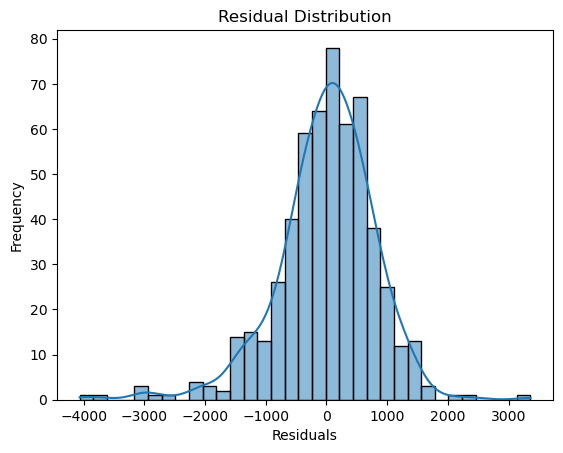

In [809]:
# Calculate the residuals and check if it is normally distributed
residuals = y_train - y_train_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

Yes. The residuals are normally distributed which supports the assumption of normality.

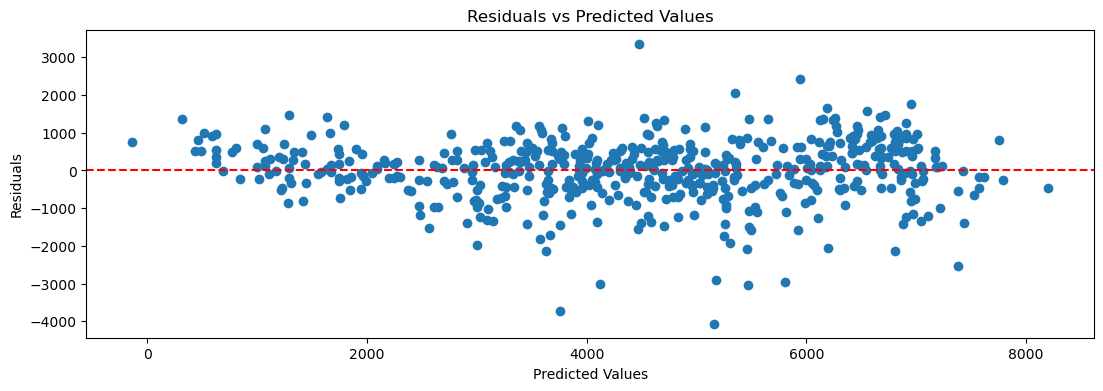

In [829]:
# Checking if residuals are independant of each other
plt.figure(figsize=(13, 4))
plt.scatter(y_train_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

The scatter plot of residuals versus predicted values shows a roughly random pattern around zero, suggesting linearity and homoscedasticity assumptions are reasonably met.

### Step 4 - Prediction and Evaluation on the Test data

In [839]:
#Removing the independant variables which were dropped during training 
X_test_refined = X_test.drop(["holiday","second_half", "Sunday", "atemp", "Saturday", 
                  "March", "October", "February", "temp_variance", "July", "weekend", 
                  "windspeed", "hum", "Thursday", "% of Registered users", "Wednesday", 
                  "May", "June", "workingday", "Monday", "Humidity-Wind factor"],axis=1)

In [854]:
# Adding constant to the refined test data
X_test_refined_const = sm.add_constant(X_test_refined)

# Predict on test
y_test_pred = lr_model.predict(X_test_refined_const)

# Calculate R-squared score on the test set
test_r2 = r2_score(y_test, y_test_pred)
print (test_r2)

0.8075163812643229


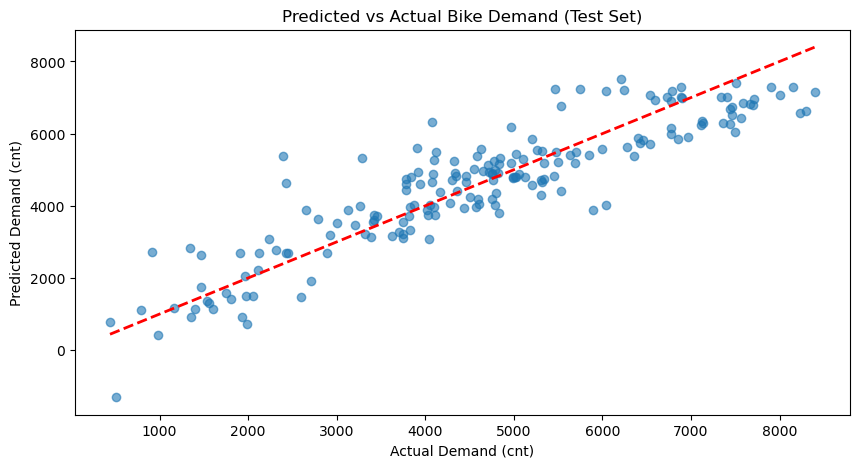

In [860]:
# Plot predicted vs actual values for test data
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Predicted vs Actual Bike Demand (Test Set)")
plt.xlabel("Actual Demand (cnt)")
plt.ylabel("Predicted Demand (cnt)")
plt.show()

#### The R-squared score on the test set is 0.81, indicating that our refined model explains about 81% of the variance in bike demand on unseen data.

#### The Predicted vs. Actual plot shows a strong alignment along the diagonal line, suggesting that predictions closely match actual values.